# Project 3 - Machine Learning Ames Housing Data

### Goal

* Data analysis on Ames housing Data to investigate major factors and features influencing house sale prices in Ames, Iowa
* Build predictive machine learning models for the local house price prediction

### Ames, Iowa

* College town of Iowa State University (ISU)
* ISU is the largest employer of the city
* A population of 66,427 (2020 census), which is the state's 9th largest city
* ISU was home to 33,391 students as of fall 2019, which make up approximately one half of the city's population
* Around 30% poverty rate

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib
#%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import Markdown, display

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Part I - Data loading & Data Cleaning

### Data - housing sale price

### 1. Load data

In [4]:
# load data
housing = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0)

# save a copy of raw data [RAW DATA]
housing_raw = housing.copy()

# check dimension
housing.shape

(2580, 81)

In [5]:
### reset dataset
#housing = housing_raw.copy()

In [6]:
#housing.columns

In [7]:
housing.head()

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
1  909176150        856     126000          30       RL          NaN     7890   
2  905476230       1049     139500         120       RL         42.0     4235   
3  911128020       1001     124900          30  C (all)         60.0     6060   
4  535377150       1039     114000          70       RL         80.0     8146   
5  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1   Pave   NaN      Reg  ...         166        0    NaN   NaN         NaN   
2   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
3   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
4   Pave   NaN      Reg  ...         111        0    NaN   NaN         NaN   
5   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold SaleType  SaleCondition  
1       0      3   2010      WD          Normal  
2       0      2   2009      WD          Normal  
3       0     11   2007      WD          Normal  
4       0      5   2009      WD          Normal  
5       0     11   2009      WD          Normal  

[5 rows x 81 columns]

In [8]:
housing.PID.nunique()

2579

In [9]:
housing[housing.duplicated()]

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
1  909276070       1717     194000          50       RL         80.0    12400   

  Street Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1   Pave   NaN      Reg  ...         113        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold SaleType  SaleCondition  
1       0      2   2006      WD          Normal  

[1 rows x 81 columns]

In [10]:
housing1 = housing.copy()# with duplicated rows where PID = 909276070
housing.drop_duplicates(inplace=True)

In [11]:
print(housing1.shape)
print(housing.shape)
housing[housing.duplicated()]

(2580, 81)
(2579, 81)


Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 81 columns]

In [12]:
saleprice = housing['SalePrice']
saleprice.shape

(2579,)

### 2. check data type

In [13]:
pd.set_option('display.max_rows', 500)
housing.dtypes

PID                int64
GrLivArea          int64
SalePrice          int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64


### 3. Missing values and imputation

In [14]:
df_null = pd.isnull(housing).sum().sort_values(ascending=False)[pd.isnull(housing).sum().sort_values(ascending=False) >0]

In [15]:
print(df_null.shape)
df_null

(27,)


PoolQC          2570
MiscFeature     2482
Alley           2411
Fence           2054
FireplaceQu     1241
LotFrontage      462
GarageFinish     129
GarageQual       129
GarageYrBlt      129
GarageCond       129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtFinType1      69
BsmtCond          69
BsmtQual          69
MasVnrArea        14
MasVnrType        14
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
GarageCars         1
Electrical         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
TotalBsmtSF        1
dtype: int64

In [16]:
col_null = df_null.index
col_null

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'BsmtHalfBath', 'BsmtFullBath',
       'GarageArea', 'GarageCars', 'Electrical', 'BsmtUnfSF', 'BsmtFinSF2',
       'BsmtFinSF1', 'TotalBsmtSF'],
      dtype='object')

In [17]:
housing[col_null].dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [18]:
col_null_object = col_null[housing[col_null].dtypes == 'object']
col_null_numeric = col_null[housing[col_null].dtypes == 'float64']

print(len(col_null_object))
print(len(col_null_numeric))

16
11


In [19]:
print(col_null_object)
print(col_null_numeric)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrType', 'Electrical'],
      dtype='object')
Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath',
       'BsmtFullBath', 'GarageArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF2',
       'BsmtFinSF1', 'TotalBsmtSF'],
      dtype='object')


# Categorical
(1) PoolQC
(2) MiscFeature
(3) Alley
(4) Fence
(5) FireplaceQu
(6) GarageFinish
(7) GarageQual
(8) GarageCond
(9) GarageType
(10) BsmtExposure
(11) BsmtFinType2
(12) BsmtFinType1
(13) BsmtCond
(14) BsmtQual
(15) MasVnrType
(16) Electrical

# Numerical
(17) LotFrontage
(18) GarageYrBlt
(19) MasVnrArea
(20) BsmtHalfBath
(21) BsmtFullBath
(22) GarageArea
(23) GarageCars
(24) BsmtUnfSF
(25) BsmtFinSF2
(25) BsmtFinSF1
(27) TotalBsmtSF

In [20]:
# %run test.ipynb

In [21]:
#a

### 3.1 Categorical

***(1) PoolQC***

In [22]:
col = "PoolQC"

print(housing[col].value_counts(dropna=False))
#housing.loc[pd.isnull(housing[col])].describe()
housing.loc[pd.isnull(housing[col])].filter(regex='^Pool').describe()

NaN    2570
TA        3
Fa        2
Ex        2
Gd        2
Name: PoolQC, dtype: int64


PoolArea
count    2570.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0

In [23]:
### corresponding area are all 0, so no pool:

In [24]:
#replacement = "No pool"
replacement = "NA"

housing[col] = housing[col].replace({np.nan: replacement})
housing[col].value_counts(dropna=False)

NA    2570
TA       3
Fa       2
Ex       2
Gd       2
Name: PoolQC, dtype: int64

***(2) MiscFeature***

In [25]:
col = "MiscFeature"

print(housing[col].value_counts(dropna=False))
#housing.loc[pd.isnull(housing[col])].describe()

NaN     2482
Shed      88
Gar2       5
Othr       3
TenC       1
Name: MiscFeature, dtype: int64


In [26]:
### Just no misc features:
#replacement = "No misc. features"

housing[col] = housing[col].replace({np.nan: replacement})
housing[col].value_counts(dropna=False)

NA      2482
Shed      88
Gar2       5
Othr       3
TenC       1
Name: MiscFeature, dtype: int64

***(3) Alley***

In [27]:
col = "Alley"

print(housing[col].value_counts(dropna=False))
#housing.loc[pd.isnull(housing[col])].describe()

NaN     2411
Grvl     105
Pave      63
Name: Alley, dtype: int64


In [28]:
### Just no alley:
#replacement = "No alley"

housing[col] = housing[col].replace({np.nan: replacement})
housing[col].value_counts(dropna=False)

NA      2411
Grvl     105
Pave      63
Name: Alley, dtype: int64

***(4) Fence***

In [29]:
col = "Fence"

print(housing[col].value_counts(dropna=False))
#housing.loc[pd.isnull(housing[col])].describe()

NaN      2054
MnPrv     301
GdPrv     111
GdWo      103
MnWw       10
Name: Fence, dtype: int64


In [30]:
### No fence:
#replacement = "No fence"

housing[col] = housing[col].replace({np.nan: replacement})
housing[col].value_counts(dropna=False)

NA       2054
MnPrv     301
GdPrv     111
GdWo      103
MnWw       10
Name: Fence, dtype: int64

***(5) FireplaceQu***

In [31]:
col = "FireplaceQu"

print(housing[col].value_counts(dropna=False))
#housing.loc[pd.isnull(housing[col])].Fireplaces.describe()
housing.loc[pd.isnull(housing[col])].filter(regex='^Fireplace').describe()

NaN    1241
Gd      618
TA      572
Fa       70
Po       43
Ex       35
Name: FireplaceQu, dtype: int64


Fireplaces
count      1241.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0

In [32]:
### All corresponding no. of fireplace are 0, so NO fireplaces:
#replacement = "No fireplace"

housing[col] = housing[col].replace({np.nan: replacement})
housing[col].value_counts(dropna=False)

NA    1241
Gd     618
TA     572
Fa      70
Po      43
Ex      35
Name: FireplaceQu, dtype: int64

***(6) GarageFinish***

***(7) GarageQual***

***(8) GarageCond***

***(9) GarageType***

***(18) GarageYrBlt***

***(22) GarageArea***

***(23) GarageCars***


In [33]:
pd.isnull(housing.filter(regex='^Garage')).sum()

GarageType      127
GarageYrBlt     129
GarageFinish    129
GarageCars        1
GarageArea        1
GarageQual      129
GarageCond      129
dtype: int64

In [34]:
garage_na = housing.loc[pd.isnull(housing.GarageYrBlt)].filter(regex='^Garage|^PID|YearBuilt')
print(garage_na.shape) #(129, 7)
#garage_na

(129, 9)


In [35]:
garage_na.GarageType.value_counts()

Detchd    2
Name: GarageType, dtype: int64

In [36]:
garage_na.loc[garage_na.GarageType == "Detchd"]

PID  YearBuilt GarageType  GarageYrBlt GarageFinish  GarageCars  \
434  910201180       1923     Detchd          NaN          NaN         NaN   
532  903426160       1910     Detchd          NaN          NaN         1.0   

     GarageArea GarageQual GarageCond  
434         NaN        NaN        NaN  
532       360.0        NaN        NaN

In [37]:
#housing.loc[housing.GarageFinish == "Unf","GarageCars"].describe()

In [38]:
housing.loc[housing.PID == 910201180,"YearBuilt"]

434    1923
Name: YearBuilt, dtype: int64

In [39]:
housing.loc[housing.PID == 903426160,"YearBuilt"]

532    1910
Name: YearBuilt, dtype: int64

In [40]:
housing.loc[housing.PID == 910201180, ["GarageYrBlt",
                                       "GarageFinish",
                                       "GarageCars",
                                       "GarageArea",
                                       "GarageQual",
                                       "GarageCond"]] = [1923,
                                                         replacement,
                                                         1,
                                                         0,
                                                         replacement,
                                                         replacement]

housing.loc[housing.PID == 903426160, ["GarageYrBlt",
                                       "GarageFinish",
                                       #"GarageCars",
                                       #"GarageArea",
                                       "GarageQual",
                                       "GarageCond"]] = [1910,
                                                         replacement,
                                                         #1,
                                                         #0,
                                                         replacement,
                                                         replacement]

In [41]:
housing.loc[housing.PID == 910201180 ].filter(regex='^Garage|^PID|YearBuilt')

PID  YearBuilt GarageType  GarageYrBlt GarageFinish  GarageCars  \
434  910201180       1923     Detchd       1923.0           NA         1.0   

     GarageArea GarageQual GarageCond  
434         0.0         NA         NA

In [42]:
housing.loc[housing.PID == 903426160 ].filter(regex='^Garage|^PID|YearBuilt')

PID  YearBuilt GarageType  GarageYrBlt GarageFinish  GarageCars  \
532  903426160       1910     Detchd       1910.0           NA         1.0   

     GarageArea GarageQual GarageCond  
532       360.0         NA         NA

In [43]:
pd.isnull(housing.filter(regex='^Garage')).sum()

GarageType      127
GarageYrBlt     127
GarageFinish    127
GarageCars        0
GarageArea        0
GarageQual      127
GarageCond      127
dtype: int64

In [44]:
housing.loc[pd.isnull(housing.GarageType)].filter(regex='^Garage').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 18 to 730
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    0 non-null      object 
 1   GarageYrBlt   0 non-null      float64
 2   GarageFinish  0 non-null      object 
 3   GarageCars    127 non-null    float64
 4   GarageArea    127 non-null    float64
 5   GarageQual    0 non-null      object 
 6   GarageCond    0 non-null      object 
dtypes: float64(3), object(4)
memory usage: 7.9+ KB


In [45]:
housing.loc[pd.isnull(housing.GarageType)].filter(regex='^Garage').columns

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [46]:
# replace null GarageYrBuilt by YearBuilt:

In [47]:
replacement_yrblt = housing.loc[pd.isnull(housing.GarageYrBlt),'YearBuilt']
housing.loc[pd.isnull(housing.GarageYrBlt),'GarageYrBlt'] = replacement_yrblt

In [48]:
# replace other nulls:

In [49]:
#replacement = "No garage"
replacement1 = 0

garage_object = ['GarageType', 
                 #'GarageYrBlt', 
                 'GarageFinish', 'GarageCars', 'GarageArea','GarageQual', 'GarageCond']


for col in garage_object:
    if(housing[[col]].dtypes == 'object').any():
        housing[col] = housing[col].replace({np.nan: replacement})
    else:
        housing[col] = housing[col].replace({np.nan: replacement1})


In [50]:
housing.loc[pd.isnull(housing.GarageType)].filter(regex='^Garage')

Empty DataFrame
Columns: [GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond]
Index: []

In [51]:
pd.isnull(housing.filter(regex='^Garage')).sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

***(10) BsmtExposure***

***(11) BsmtExposure***

***(12) BsmtFinType2***

***(13) BsmtFinType1***

***(14) BsmtCond***

***(20) BsmtHalfBath***

***(21) BsmtFullBath***

***(24) BsmtUnfSF***

***(25) BsmtFinSF2***

***(26) BsmtFinSF1***

***(27) TotalBsmtSF***

In [52]:
pd.isnull(housing.filter(regex='^Bsmt|TotalBsmt')).sum()

BsmtQual        69
BsmtCond        69
BsmtExposure    71
BsmtFinType1    69
BsmtFinSF1       1
BsmtFinType2    70
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
dtype: int64

In [53]:
bsmt_na = housing.loc[pd.isnull(housing.BsmtExposure )].filter(regex='^Bsmt|TotalBsmt|^PID|YearBuilt')
#bsmt_na
pd.isnull(bsmt_na.filter(regex='^Bsmt|TotalBsmt')).sum()

BsmtQual        69
BsmtCond        69
BsmtExposure    71
BsmtFinType1    69
BsmtFinSF1       1
BsmtFinType2    69
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
dtype: int64

In [54]:
bsmt_na.BsmtQual.value_counts()

Gd    2
Name: BsmtQual, dtype: int64

In [55]:
bsmt_na.loc[bsmt_na.BsmtQual == "Gd"]

PID  YearBuilt BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
814  907194130       2002       Gd       TA          NaN          Unf   
202  528445060       2005       Gd       TA          NaN          Unf   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
814         0.0          Unf         0.0      936.0        936.0   
202         0.0          Unf         0.0     1595.0       1595.0   

     BsmtFullBath  BsmtHalfBath  
814           0.0           0.0  
202           0.0           0.0

In [56]:
bsmt_na.loc[bsmt_na.BsmtFinType1 == "Unf"].BsmtExposure.value_counts(dropna=False)

NaN    2
Name: BsmtExposure, dtype: int64

In [57]:
housing.loc[housing.PID.isin([907194130,528445060]),"BsmtExposure"] = "No"

In [58]:
bsmt_na = housing.loc[pd.isnull(housing.BsmtExposure )].filter(regex='^Bsmt|TotalBsmt|^PID|YearBuilt')
#bsmt_na
pd.isnull(bsmt_na.filter(regex='^Bsmt|TotalBsmt')).sum()

BsmtQual        69
BsmtCond        69
BsmtExposure    69
BsmtFinType1    69
BsmtFinSF1       1
BsmtFinType2    69
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
dtype: int64

In [59]:
bsmt_na

PID  YearBuilt BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
6    908128060       2003      NaN      NaN          NaN          NaN   
97   535457050       1961      NaN      NaN          NaN          NaN   
165  531475220       1981      NaN      NaN          NaN          NaN   
210  905228050       1947      NaN      NaN          NaN          NaN   
216  535450160       1950      NaN      NaN          NaN          NaN   
329  535327230       1957      NaN      NaN          NaN          NaN   
337  908204180       1955      NaN      NaN          NaN          NaN   
453  902427045       1956      NaN      NaN          NaN          NaN   
479  532351150       1977      NaN      NaN          NaN          NaN   
496  902205010       1940      NaN      NaN          NaN          NaN   
553  531477040       1977      NaN      NaN          NaN          NaN   
557  908204160       1955      NaN      NaN          NaN          NaN   
590  906226120       1979      NaN      NaN          NaN          NaN   
591  535327140       1955      NaN      NaN          NaN          NaN   
608  906226060       1880      NaN      NaN          NaN          NaN   
684  916252170       1986      NaN      NaN          NaN          NaN   
742  905475520       1958      NaN      NaN          NaN          NaN   
796  904100170       1950      NaN      NaN          NaN          NaN   
905  910206010       1939      NaN      NaN          NaN          NaN   
906  903232030       1945      NaN      NaN          NaN          NaN   
913  903230120       1946      NaN      NaN          NaN          NaN   
918  534450090       1946      NaN      NaN          NaN          NaN   
89   904101170       1959      NaN      NaN          NaN          NaN   
128  905480180       1957      NaN      NaN          NaN          NaN   
168  905402070       1954      NaN      NaN          NaN          NaN   
237  902427180       1949      NaN      NaN          NaN          NaN   
263  532351140       1978      NaN      NaN          NaN          NaN   
280  908102130       1965      NaN      NaN          NaN          NaN   
295  534276190       1956      NaN      NaN          NaN          NaN   
309  908152180       1979      NaN      NaN          NaN          NaN   
368  535451210       1950      NaN      NaN          NaN          NaN   
393  923202060       1960      NaN      NaN          NaN          NaN   
398  905101330       1967      NaN      NaN          NaN          NaN   
537  534276290       1959      NaN      NaN          NaN          NaN   
545  908250030       1952      NaN      NaN          NaN          NaN   
555  905475500       1957      NaN      NaN          NaN          NaN   
576  535454050       1949      NaN      NaN          NaN          NaN   
620  535451170       1949      NaN      NaN          NaN          NaN   
679  905228020       1945      NaN      NaN          NaN          NaN   
744  908250040       1947      NaN      NaN          NaN          NaN   
756  909275160       1951      NaN      NaN          NaN          NaN   
775  908225370       1945      NaN      NaN          NaN          NaN   
796  535425050       1959      NaN      NaN          NaN          NaN   
800  908102050       1949      NaN      NaN          NaN          NaN   
8    535375140       1948      NaN      NaN          NaN          NaN   
20   534252070       1964      NaN      NaN          NaN          NaN   
38   534429030       1962      NaN      NaN          NaN          NaN   
65   535454060       1950      NaN      NaN          NaN          NaN   
90   914476020       1977      NaN      NaN          NaN          NaN   
135  535353060       1953      NaN      NaN          NaN          NaN   
160  527226010       1948      NaN      NaN          NaN          NaN   
165  535383100       1900      NaN      NaN          NaN          NaN   
192  923202220       1953      NaN      NaN          NaN          NaN   
194  535451190       1950      NaN      NaN          NaN          NaN

In [60]:
#replacement = "No basement"
replacement1 = 0

garage_object = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]


for col in garage_object:
    if(housing[[col]].dtypes == 'object').any():
        housing[col] = housing[col].replace({np.nan: replacement})
    else:
        housing[col] = housing[col].replace({np.nan: replacement1})


In [61]:
pd.isnull(housing.filter(regex='^Bsmt|TotalBsmt')).sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

***(15) MasVnrType***

In [62]:
col = "MasVnrType"

print(housing[col].value_counts(dropna=False))
print(housing.loc[pd.isnull(housing[col])].filter(regex='^Mas').describe())

None       1558
BrkFace     804
Stone       183
BrkCmn       20
NaN          14
Name: MasVnrType, dtype: int64
       MasVnrArea
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN


In [63]:
### corresponding area are all NaN, so No masonry:

In [64]:
#replacement = "No masonry"

housing[col] = housing[col].replace({np.nan: replacement})
housing[col].value_counts(dropna=False)

None       1558
BrkFace     804
Stone       183
BrkCmn       20
NA           14
Name: MasVnrType, dtype: int64

***(16) Electrical***

In [65]:
col = "Electrical"

print(housing[col].value_counts(dropna=False))
#housing.loc[pd.isnull(housing[col]),"YearBuilt"] #2006
housing.loc[housing.YearBuilt == 2006,col].value_counts(dropna=False)

SBrkr    2364
FuseA     168
FuseF      39
FuseP       7
NaN         1
Name: Electrical, dtype: int64


SBrkr    79
NaN       1
Name: Electrical, dtype: int64

In [66]:
### all 2006 built houses are SBrkr:

In [67]:
#replacement = "SBrkr"

housing[col] = housing[col].replace({np.nan: replacement})
housing[col].value_counts(dropna=False)

SBrkr    2364
FuseA     168
FuseF      39
FuseP       7
NA          1
Name: Electrical, dtype: int64

### 3.2 numerical

***(17) LotFrontage***

In [68]:
col = "LotFrontage"
replacement1 = 0

housing[col] = housing[col].replace({np.nan: replacement1})
print(pd.isnull(housing[col]).sum())

0


***(19) MasVnrArea***

In [69]:
# from (15)

col = "MasVnrArea"
replacement1 = 0

housing[col] = housing[col].replace({np.nan: replacement1})
print(pd.isnull(housing[col]).sum())

0


In [70]:
# Check - no null any more

In [71]:
pd.isnull(housing).sum().sort_values(ascending=False)[pd.isnull(housing).sum().sort_values(ascending=False) >0]

Series([], dtype: int64)

## Part II - Exploratory Data Analysis

All the features are categorized into followings:

**1 sale**

**2 neighborhood**

**3 age**

**4 exterior**

**5 lot**

**6 quality**

**7 size**

**8 no. of rooms**

**9 basement**

**10 others**

**11 utility**

**12 garage**

In [72]:
sale = [
    'MoSold',
    'SaleCondition',
    'SaleType',
    'YrSold']

age = [
    'YearBuilt',
    'YearRemodAdd',
    'GarageYrBlt']

neighborhood = [
    'MSZoning',
    'Neighborhood']

exterior = [
    'BldgType',
    'Exterior1st',
    'Exterior2nd',
    'Fence',
    'Foundation',
    'HouseStyle',
    'MasVnrType',
    'RoofMatl',
    'RoofStyle']

lot = [
    'Alley',
    'LandContour',
    'LandSlope',
    'LotArea',
    'LotConfig',
    'LotFrontage',
    'LotShape',
    'PavedDrive',
    'Street',
    'Condition1', #lot - accessibility
    'Condition2'] #lot - accessibility



quality = [
    'BsmtCond',
    'BsmtQual',
    'ExterCond',
    'ExterQual',
    'FireplaceQu', # repeated
    'GarageCond',
    'GarageQual',
    'KitchenQual',
    'OverallCond',
    'OverallQual',
    'HeatingQC'] # repeated



size = [
    '1stFlrSF',
    '2ndFlrSF',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'GrLivArea',
    'LowQualFinSF',
    'MasVnrArea',
    'PoolArea',
    'TotalBsmtSF',
    'WoodDeckSF',
    'LotArea', ### repeated
    'GarageArea', ### repeated
    'EnclosedPorch',
    'OpenPorchSF',
    'ScreenPorch',
    '3SsnPorch'
]


'''no_of_rooms = [
    'Bedroom',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'Kitchen',
    'TotRmsAbvGrd']'''

no_of_rooms = [
    'BedroomAbvGr',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'KitchenAbvGr',
    'TotRmsAbvGrd']

basement = [
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2']

others = [
    'FireplaceQu',
    'Fireplaces',
    'Functional',
    'GarageArea',
    'GarageCars',
    'GarageFinish',
    'GarageType',
    'MiscFeature',
    'MiscVal',
    'MSSubClass',
    'PoolQC'
    ]

utility = [
    'CentralAir',
    'Electrical',
    'Heating',
    'HeatingQC',
    'Utilities']


#***
garage = [   ### repeated
    'GarageYrBlt',
    'GarageArea',
    'GarageCars',
    'GarageFinish',
    'GarageType',
    'GarageCond',
    'GarageQual'
]

In [73]:
def classify_features(features):

    # Numerical Features
    feature_n = housing[features].select_dtypes(include=['int64','float64']).columns
    #feature_num = feature_num.drop(['PID','SalePrice'])
    #feature_num = feature_num.drop(['PID'])

    # Categorical Features
    features_c = housing[features].select_dtypes(include=['object']).columns
    
    # return numerical & categorical lists
    return list(feature_n), list(features_c)

In [74]:
len(age) + len(basement) +len(exterior) +len(lot) +len(neighborhood) +len(no_of_rooms) +len(others) +len(quality) +len(sale) +len(size) +len(utility) 

83

In [75]:
add = []
rmv = []

### 1. Sale

In [76]:
sale

['MoSold', 'SaleCondition', 'SaleType', 'YrSold']

In [223]:
housing.SalePrice.describe()

count      2579.000000
mean     178053.442420
std       75044.983207
min       12789.000000
25%      129950.000000
50%      159900.000000
75%      209750.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [240]:
plt.figure(figsize=(23,3))

housing[['SalePrice']].boxplot(vert=False)
# housing.SalePrice.boxplot(vert=False)
#plt.xlabel('Sale Price ($)',fontsize=15)#,rotation = 45)
plt.xticks(fontsize=20)
#plt.ylabel('',fontsize=15)
# #plt.legend(title='verification  Status')
# #plt.legend().remove()
# plt.title("Boxplot of Borrowers' FICO Score",fontsize=15)

# #df.T.boxplot(vert=False)
# plt.subplots_adjust(left=0.25)
# plt.show()

# plt.show()




# sns.violinplot(y = accepted.purpose, 
#             x=accepted.loan_amnt,
#                #color = 'gray'
#             order = purpose_order,#dropna().unique())
#              # palette="Blues")
#               palette="Pastel1")

# plt.ylabel('Purpose',fontsize=20)#rotation = 45)
# plt.yticks(rotation=0,fontsize=20)
# plt.xlabel('Loan Size ($)',fontsize=20)
# plt.title('Loan Size Violin Plot by Purpose',fontsize=20)

plt.show()

In [86]:
# SalePrice
plt.figure(figsize=(20,10))
sns.histplot(housing.SalePrice)


# plt.xlabel('Industry')#,rotation = 45)
# plt.xticks(rotation=80)
# plt.ylabel('Valuation ($B)')
# plt.title('Valuation Violin Plot by Industry')

plt.xlabel('Sale price',fontsize=20)#,rotation = 45)
plt.xticks(fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Distribution of Sale Price',fontsize=20)

plt.show()

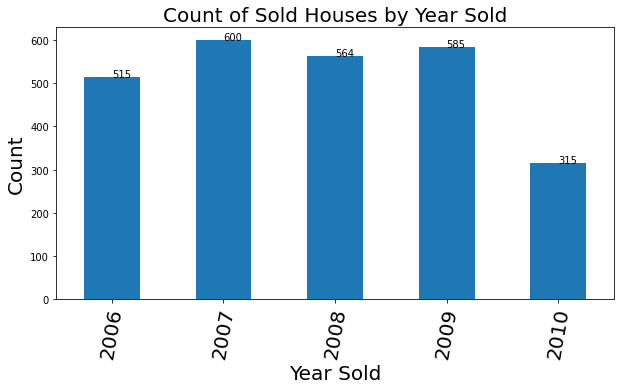

In [78]:
# Count by YrSold

plt.figure(figsize=(10,5)) 
housing.groupby('YrSold').PID.count().plot(kind='bar')

for index, value in enumerate(housing.groupby('YrSold').PID.count()):
    plt.text(index,value,str(value))


plt.xlabel('Year Sold',fontsize=20)#,rotation = 45)
plt.xticks(rotation=80,fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Count of Sold Houses by Year Sold',fontsize=20)

plt.show()

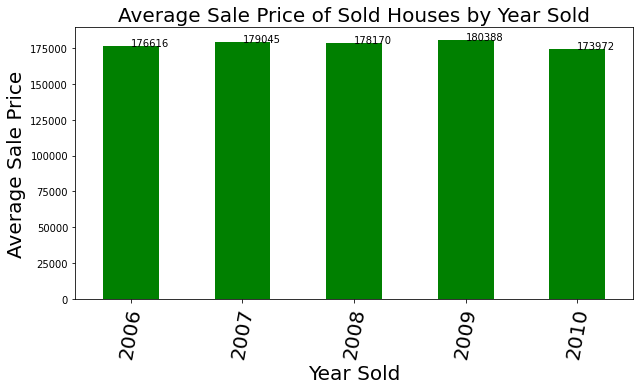

In [80]:
# Avg sale proce by YrSold

plt.figure(figsize=(10,5)) 
housing.groupby('YrSold').SalePrice.mean().plot(kind='bar',color='green')

for index, value in enumerate(housing.groupby('YrSold').SalePrice.mean()):
    plt.text(index,value,str(round(value)))


plt.xlabel('Year Sold',fontsize=20)#,rotation = 45)
plt.xticks(rotation=80,fontsize=20)
plt.ylabel('Average Sale Price',fontsize=20)
plt.title('Average Sale Price of Sold Houses by Year Sold',fontsize=20)

plt.show()

In [87]:
#rmv.append("YrSold")

In [88]:
from datetime import datetime

housing1['YrMoSold'] =  pd.to_datetime(housing1["YrSold"].astype(str)+"-"+ housing1["MoSold"].astype(str))
housing1['YrMoSold'] = housing1['YrMoSold'].dt.strftime('%Y-%m')

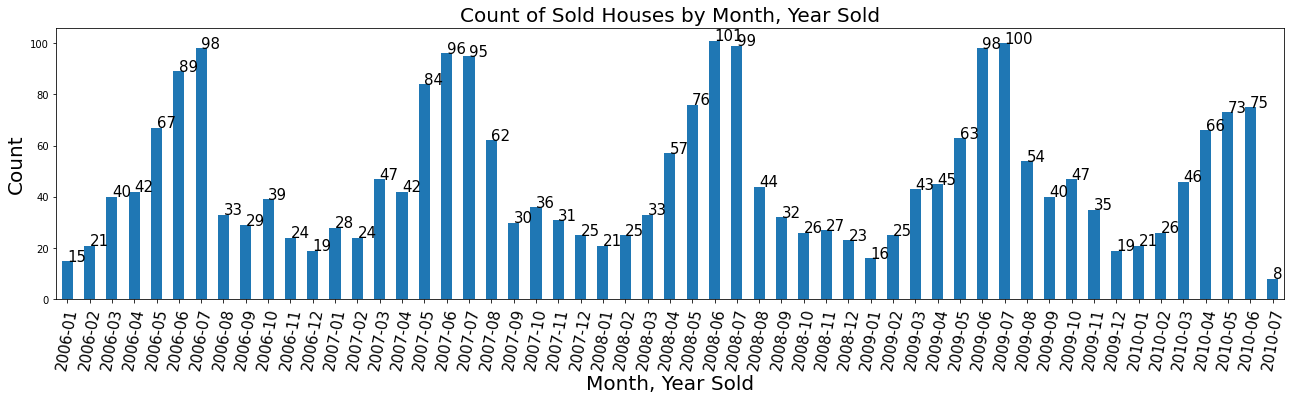

In [101]:
# Count by MoSold(YrMoSold)

plt.figure(figsize=(22,5)) 
housing1.groupby('YrMoSold').PID.count().plot(kind='bar')

for index, value in enumerate(housing1.groupby('YrMoSold').PID.count()):
    plt.text(index,value,str(value),fontsize=15)


plt.xlabel('Month, Year Sold',fontsize=20)#,rotation = 45)
plt.xticks(rotation=80,fontsize=15)
plt.ylabel('Count',fontsize=20)
plt.title('Count of Sold Houses by Month, Year Sold',fontsize=20)

plt.show()

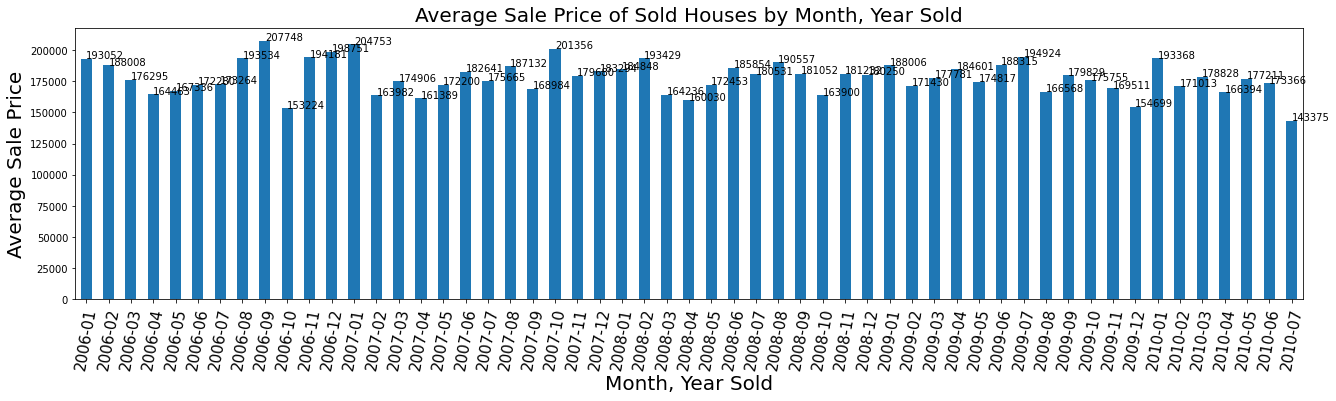

In [104]:
# Avg sale price by MoSold(YrMoSold)

plt.figure(figsize=(22,5)) 
housing1.groupby('YrMoSold').SalePrice.mean().plot(kind='bar')

for index, value in enumerate(housing1.groupby('YrMoSold').SalePrice.mean()):
    plt.text(index,value,str(round(value)),fontsize=10)


plt.xlabel('Month, Year Sold',fontsize=20)#,rotation = 45)
plt.xticks(rotation=80,fontsize=15)
plt.ylabel('Average Sale Price',fontsize=20)
plt.title('Average Sale Price of Sold Houses by Month, Year Sold',fontsize=20)

plt.show()

In [105]:
housing.SaleCondition.value_counts()

Normal     2413
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: SaleCondition, dtype: int64

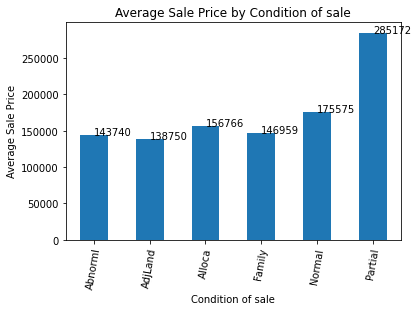

In [106]:
# Avg sale price by SaleCondition

#plt.figure(figsize=(16,5)) 
housing1.groupby('SaleCondition').SalePrice.mean().plot(kind='bar')

for index, value in enumerate(housing1.groupby('SaleCondition').SalePrice.mean()):
    plt.text(index,value,str(round(value)))


plt.xlabel('Condition of sale')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Condition of sale')

plt.show()

In [107]:
# Avg sale price by SaleType

#plt.figure(figsize=(16,5)) 
housing1.groupby('SaleType').SalePrice.mean().plot(kind='bar')

for index, value in enumerate(housing1.groupby('SaleType').SalePrice.mean()):
    plt.text(index,value,str(round(value)))


plt.xlabel('Type of sale')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Type of Sale')

plt.show()

1. Year sold is not highly related to sale price. Moderate impact by the 2008 crisis.
2. Strong seasonality. The selling market is relatively more active in summer. Higher activity level does NOT imply higher housing sale prices.
3. Distinct performance across categories for these features, so keep all 4 features as of now.

### 2. Age

In [108]:
age

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

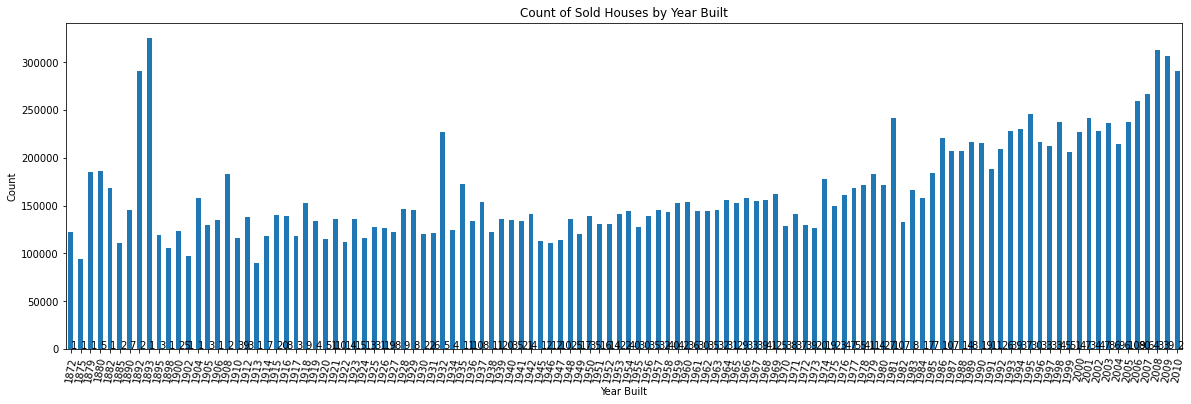

In [109]:
plt.figure(figsize=(20,6)) 
housing.groupby('YearBuilt').SalePrice.mean().plot(kind='bar')

for index, value in enumerate(housing.groupby('YearBuilt').SalePrice.count()):
    plt.text(index,value,str(value))


plt.xlabel('Year Built')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Count of Sold Houses by Year Built')

plt.show()

In [110]:
housing["Age1"] = housing.YrSold - housing.YearBuilt # house age
housing["Age2"] = housing.YrSold - housing.YearRemodAdd # house "real" age

In [111]:
plt.figure(figsize=(6,6))
#housing[["Age1"]].boxplot()
#housing[["Age2"]].describe()
#housing.loc[housing.Age2 <0,["YrSold","YearBuilt","YearRemodAdd"]]
#housing.loc[housing.Age2 <0]
housing.loc[housing.Age2 <0,"Age2"] = 0
print(housing[["Age2"]].describe())
housing['Age'] = housing['Age2']
housing = housing.drop(["Age1","Age2"], axis=1)

print(housing[["Age"]].describe())

              Age2
count  2579.000000
mean     24.074835
std      20.441543
min       0.000000
25%       5.000000
50%      16.000000
75%      43.000000
max      60.000000
               Age
count  2579.000000
mean     24.074835
std      20.441543
min       0.000000
25%       5.000000
50%      16.000000
75%      43.000000
max      60.000000


<Figure size 432x432 with 0 Axes>

In [112]:
#housing.columns

In [113]:
plt.figure(figsize=(20,6)) 
housing.groupby('Age').SalePrice.mean().plot(kind='bar')

for index, value in enumerate(housing.groupby('Age').SalePrice.mean()):
    plt.text(index,value,str(round(value)))


plt.xlabel('Age')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Average Age')
plt.title('Average Sale Price by Age')

plt.show()

In [114]:
add.append("Age")

rmv.append('YearBuilt')
rmv.append('YearRemodAdd')

1. Sale price is correlated with "real" age.
2. GarageYrBlt will be further analyzed in Garage section later.

### 3. 　Neighborhood

**Add address**

In [115]:
# load data
re = pd.read_csv('data/Ames_Real_Estate_Data.csv', index_col=0)
print(re.shape)

# save a copy of raw data [RAW DATA]
re_raw = re.copy()

# remove duplicates
re.drop_duplicates(subset=['GeoRefNo'], keep='first', inplace=True, ignore_index=True)

# check dimension
print(re.shape)

#re.columns

housing_map = pd.merge(housing, re[["GeoRefNo","Prop_Addr"]],  how='left', left_on=["PID"], right_on = ["GeoRefNo"])
print(housing_map.shape)

# check NA
print(pd.isnull(housing_map).sum().sort_values(ascending=False)[pd.isnull(housing_map).sum().sort_values(ascending=False) >0])

# drop NA
housing_map = housing_map[pd.notnull(housing_map['Prop_Addr'])]
print(housing_map.shape)

#(22213, 90)
#(21904, 90)
#(2579, 83)

(22213, 90)
(21904, 90)
(2579, 84)
Prop_Addr    20
GeoRefNo     20
dtype: int64
(2559, 84)


In [116]:
### write to csv
#housing_map[["PID","Neighborhood","Prop_Addr"]].to_csv('data/housing_add.csv')

**Add lat & lon**

In [117]:
#pip install geopy

'''import geopy
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

locator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1.5)

housing_map["Prop_Addr"] = housing_map["Prop_Addr"] + ', Ames, USA'
print(pd.isnull(housing_map).sum().sort_values(ascending=False)[pd.isnull(housing_map).sum().sort_values(ascending=False) >0])
housing_map.apply(lambda row : geocode(row['Prop_Addr']).latitude , axis = 1)'''

'import geopy\nfrom geopy import Nominatim\nfrom geopy.extra.rate_limiter import RateLimiter\n\nlocator = Nominatim(user_agent="myGeocoder")\ngeocode = RateLimiter(locator.geocode, min_delay_seconds=1.5)\n\nhousing_map["Prop_Addr"] = housing_map["Prop_Addr"] + \', Ames, USA\'\nprint(pd.isnull(housing_map).sum().sort_values(ascending=False)[pd.isnull(housing_map).sum().sort_values(ascending=False) >0])\nhousing_map.apply(lambda row : geocode(row[\'Prop_Addr\']).latitude , axis = 1)'

In [118]:
#pip install iteration_utilities

'''
lat = []
long = []
#i = 1

for row in housing_map['Prop_Addr']:
    #print(i)
    addr = geocode(row, timeout=10)
    if addr is None:
        lat.append(None)
        long.append(None)
    else:
        latitude = addr.latitude
        longitude = addr.longitude  
        lat.append(latitude)
        long.append(longitude)
    i +=1

housing_map['latitude'] = lat
housing_map['longitude'] = long'''

# housing_map.to_csv('data/housing_add.csv')
housing_map = pd.read_csv('data/housing_add.csv', index_col=0)
housing_map.shape

(2559, 85)

**draw on the map**

In [139]:
import plotly.express as px
import pandas as pd

#plt.figure(figsize=(20,20))

fig = px.scatter_mapbox(housing_map,
                        lat='latitude',
                        lon='longitude', 
                        hover_name="Neighborhood",
                        #locations = "Neighborhood",
                        #locationmode = 'country names',
                        color="Neighborhood",
                        zoom=11, 
                        mapbox_style='open-street-map',
                        #size_max=0.1
                       )
fig.update_layout(title = 'Ames, Iowa', title_x=0.5)
fig.show()

1. Higher activity level observed in areas surrounding college and airport

In [120]:
# Order Neighborhood by distance to downtown area
nbhd = ["OldTown",
"IDOTRR",
"BrkSide",
"NAmes",
"Crawfor",
"SWISU",
"NPkVill",
"Blueste",
"BrDale",
"Greens",
"Somerst",
"Veenker",
"NWAmes",
"Timber",
"MeadowV",
"StoneBr",
"ClearCr",
"Mitchel",
"Edwards",
"NoRidge",
"NridgHt",
"Blmngtn",
"Gilbert",
"Sawyer",
"Landmrk",
"CollgCr",
"SawyerW"]

**Analysis**

In [121]:
#sns.set(font_scale = 1,style='white')

In [122]:
neighborhood

['MSZoning', 'Neighborhood']

In [123]:
'''plt.figure(figsize=(100,100)) 

sns.catplot(y="Neighborhood", hue="BedroomAbvGr", kind="count",
            palette="pastel", 
            edgecolor="0.3",
            data=housing,#.loc[unicorn2022.country.isin(['United States','China'])],
            #order=housing.industry.value_counts().index,
            order = nbhd
           )

plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.title('Size Comparison by Neighborhood')

plt.show()'''

'plt.figure(figsize=(100,100)) \n\nsns.catplot(y="Neighborhood", hue="BedroomAbvGr", kind="count",\n            palette="pastel", \n            edgecolor="0.3",\n            data=housing,#.loc[unicorn2022.country.isin([\'United States\',\'China\'])],\n            #order=housing.industry.value_counts().index,\n            order = nbhd\n           )\n\nplt.xlabel(\'Count\')\nplt.ylabel(\'Neighborhood\')\nplt.title(\'Size Comparison by Neighborhood\')\n\nplt.show()'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'OldTown'),
  Text(1, 0, 'IDOTRR'),
  Text(2, 0, 'BrkSide'),
  Text(3, 0, 'NAmes'),
  Text(4, 0, 'Crawfor'),
  Text(5, 0, 'SWISU'),
  Text(6, 0, 'NPkVill'),
  Text(7, 0, 'Blueste'),
  Text(8, 0, 'BrDale'),
  Text(9, 0, 'Greens'),
  Text(10, 0, 'Somerst'),
  Text(11, 0, 'Veenker'),
  Text(12, 0, 'NWAmes'),
  Text(13, 0, 'Timber'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'StoneBr'),
  Text(16, 0, 'ClearCr'),
  Text(17, 0, 'Mitchel'),
  Text(18, 0, 'Edwards'),
  Text(19, 0, 'NoRidge'),
  Text(20, 0, 'NridgHt'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'Gilbert'),
  Text(23, 0, 'Sawyer'),
  Text(24, 0, 'Landmrk'),
  Text(25, 0, 'CollgCr'),
  Text(26, 0, 'SawyerW')])

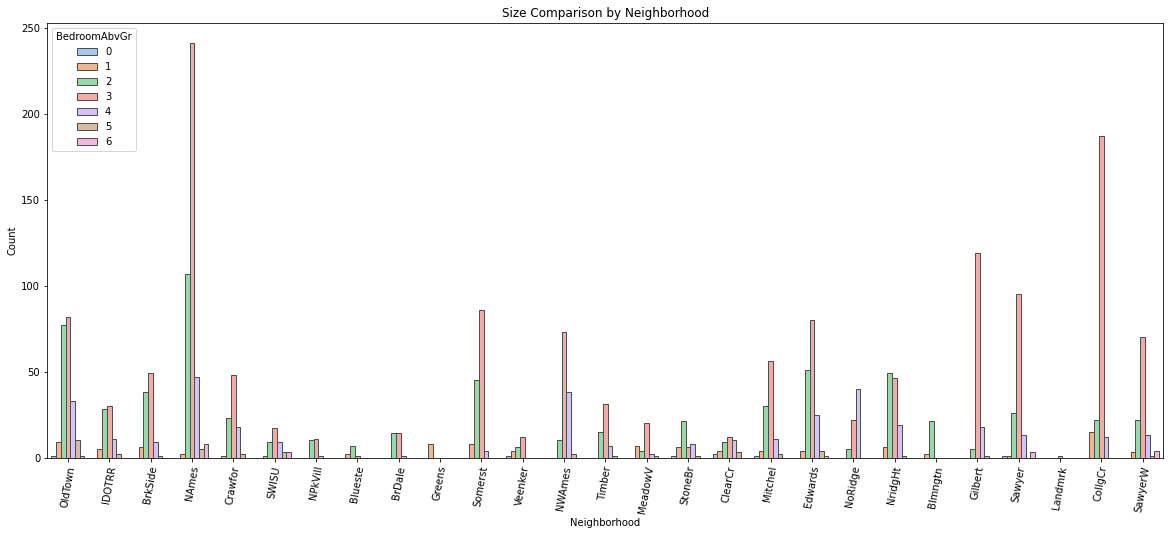

In [124]:
plt.figure(figsize=(20,8))

sns.countplot(x="Neighborhood", hue="BedroomAbvGr", #kind="count"
              palette="pastel", edgecolor=".3",
              data=housing,#.loc[unicorn2022.country.isin(["United States","China"])],
              #hue_order = hue_order
              order = nbhd
              ).\
              set(title='Size Comparison by Neighborhood',xlabel='Neighborhood',ylabel='Count')


#plt.xlabel('Industry',rotation = 45)
plt.xticks(rotation=80)

1. 3 beds is the most popular type of houses across neighborhoods.
2. Activeness of sales are different across neighborhoods.

In [125]:
#housing.YearBuilt
#housing["Age"] = housing.YrSold - housing.YearBuilt

In [126]:
'''sort_dict_nbhd = {"OldTown":1,
"IDOTRR":2,
"BrkSide":3,
"NAmes":4,
"Crawfor":5,
"SWISU":6,
"NPkVill":7,
"Blueste":8,
"BrDale":9,
"Greens":10,
"Somerst":11,
"Veenker":12,
"NWAmes":13,
"Timber":14,
"MeadowV":15,
"StoneBr":16,
"ClearCr":17,
"Mitchel":18,
"Edwards":19,
"NoRidge":20,
"NridgHt":21,
"Blmngtn":22,
"Gilbert":23,
"Sawyer":24,
"Landmrk":25,
"CollgCr":26,
"SawyerW":27}'''

#df.iloc[df['A'].map(sort_dict).sort_values().index]

'sort_dict_nbhd = {"OldTown":1,\n"IDOTRR":2,\n"BrkSide":3,\n"NAmes":4,\n"Crawfor":5,\n"SWISU":6,\n"NPkVill":7,\n"Blueste":8,\n"BrDale":9,\n"Greens":10,\n"Somerst":11,\n"Veenker":12,\n"NWAmes":13,\n"Timber":14,\n"MeadowV":15,\n"StoneBr":16,\n"ClearCr":17,\n"Mitchel":18,\n"Edwards":19,\n"NoRidge":20,\n"NridgHt":21,\n"Blmngtn":22,\n"Gilbert":23,\n"Sawyer":24,\n"Landmrk":25,\n"CollgCr":26,\n"SawyerW":27}'

In [127]:
#housing.Age.describe()

In [128]:
#df1 = housing.groupby('Neighborhood').Age.mean()#.plot(kind="bar")
#df1.index
#pd.Series(data = df1, index = nbhd)

#pd.Series(data = housing.groupby('Neighborhood').Age.mean(), index = nbhd)

In [143]:
import matplotlib as mp

data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

#color=color_map(data_normalizer(likeability_scores))

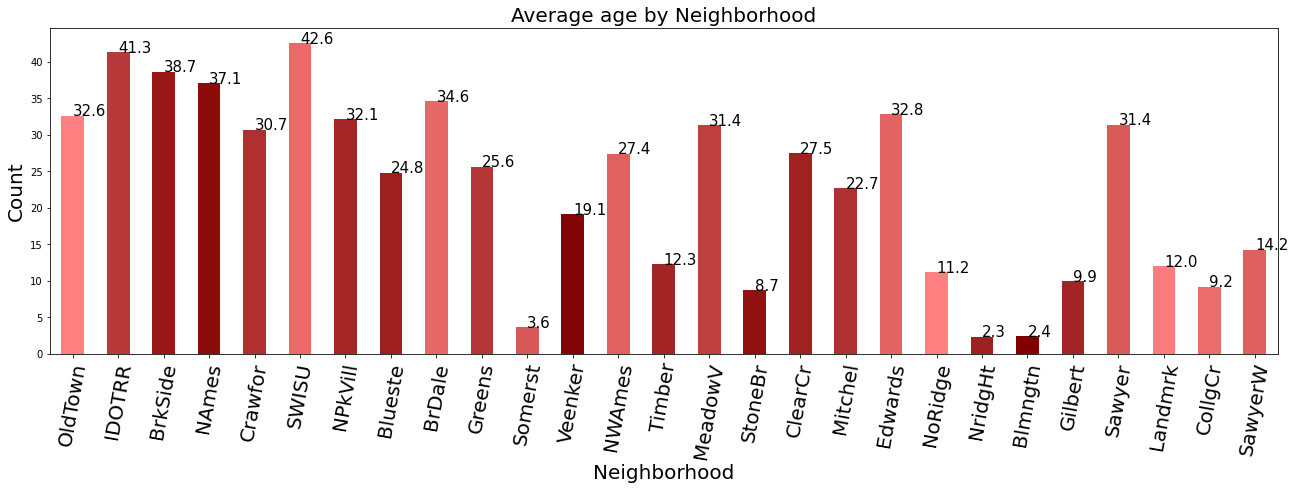

In [151]:
plt.figure(figsize=(22,6)) 

pd.Series(data = housing.groupby('Neighborhood').Age.mean(), index = nbhd).plot(kind="bar",
                                                                               color=color_map(data_normalizer(pd.Series(data = housing.groupby('Neighborhood').Age.mean()))))

for index, value in enumerate(pd.Series(data = housing.groupby('Neighborhood').Age.mean(), index = nbhd)):
    plt.text(index,value,str(round(value,1)),fontsize=15)


plt.xlabel('Neighborhood',fontsize=20)#,rotation = 45)
plt.xticks(rotation=80,fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Average age by Neighborhood',fontsize=20)

plt.show()

In [130]:
plt.figure(figsize=(20,6)) 

pd.Series(data = housing.groupby('Neighborhood').SalePrice.mean(), index = nbhd).plot(kind="bar")

for index, value in enumerate(pd.Series(data = housing.groupby('Neighborhood').SalePrice.mean(), index = nbhd)):
    plt.text(index,value,str(round(value)))


plt.xlabel('Neighborhood')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Sale pRICE ($)')
plt.title('Average Sale Price by Neighborhood')

plt.show()

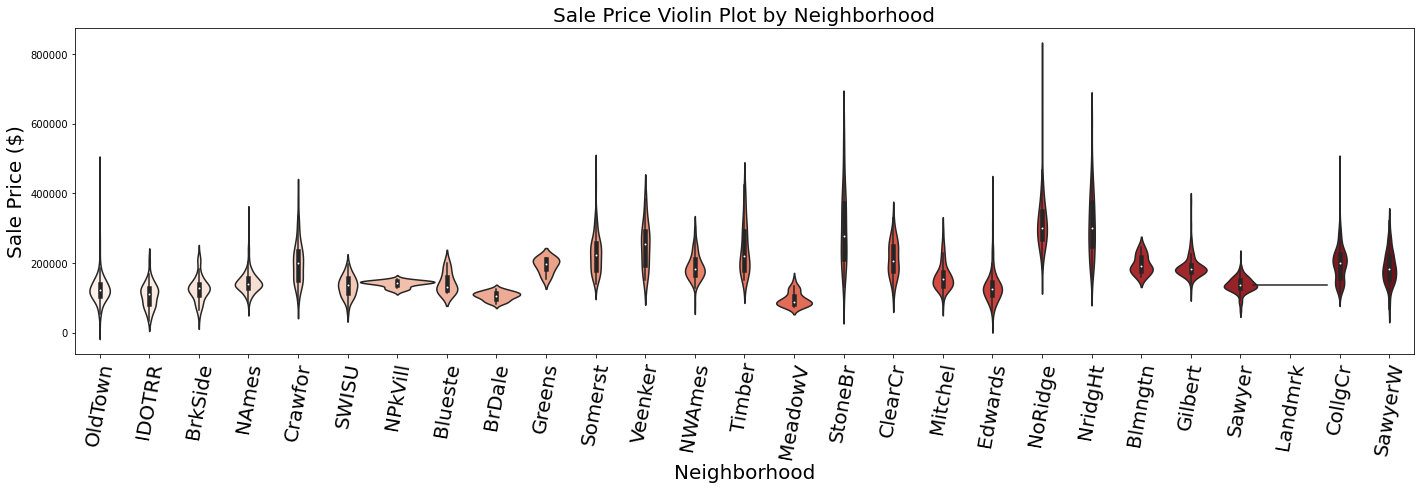

In [166]:
plt.figure(figsize=(24,6)) 
#sns.set(font_scale = 1.6,style='white')
sns.violinplot(x = housing.Neighborhood, y=housing.SalePrice, order=nbhd,width=1.5,
              #palette=color_map(data_normalizer(pd.Series(data = housing.groupby('Neighborhood').SalePrice.mean()))))
               palette='Reds')



plt.xlabel('Neighborhood',fontsize=20)#,rotation = 45)
plt.xticks(rotation=80,fontsize=20)
plt.ylabel('Sale Price ($)',fontsize=20)
plt.title('Sale Price Violin Plot by Neighborhood',fontsize=20)

plt.show()
#sns.reset_defaults()

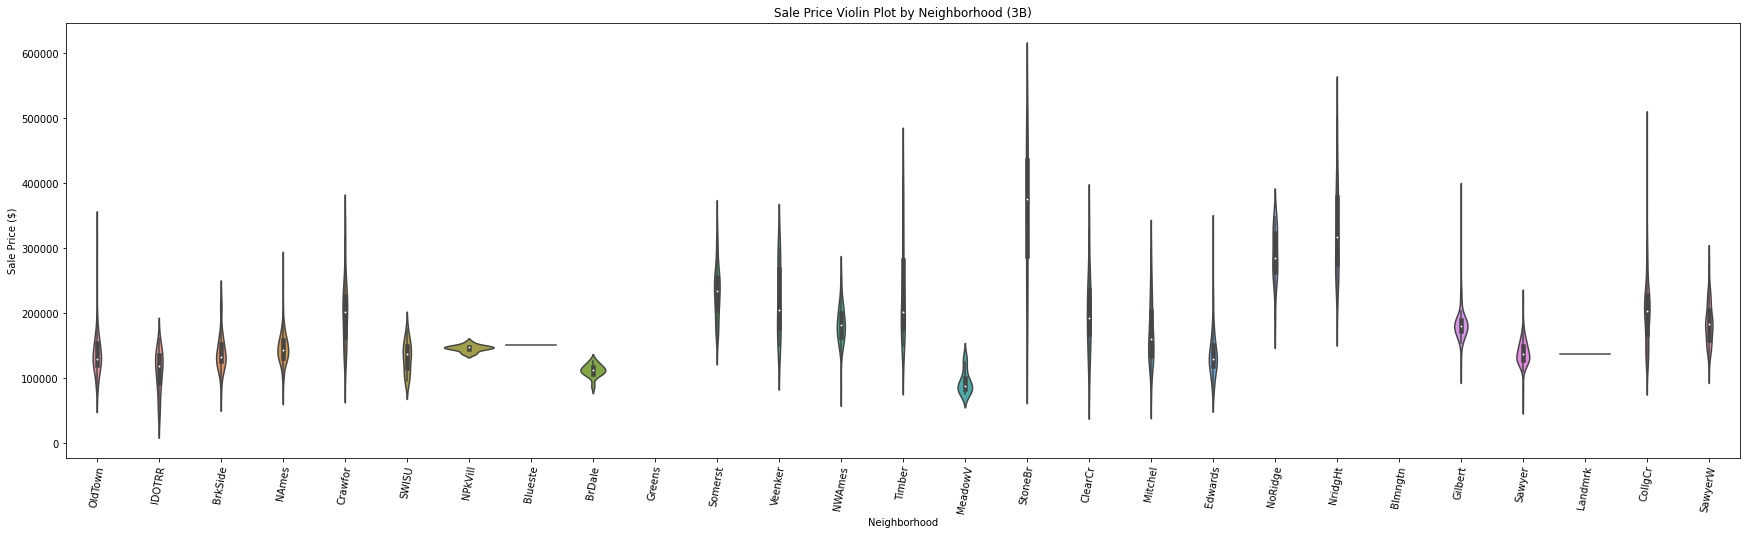

In [132]:
plt.figure(figsize=(30,8)) 
#sns.set(font_scale = 1.6,style='white')
sns.violinplot(x = housing.Neighborhood[housing.BedroomAbvGr == 3], 
               y=housing.SalePrice[housing.BedroomAbvGr == 3],
              order = nbhd)

plt.xlabel('Neighborhood')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Sale Price ($)')
plt.title('Sale Price Violin Plot by Neighborhood (3B)')

plt.show()
#sns.reset_defaults()

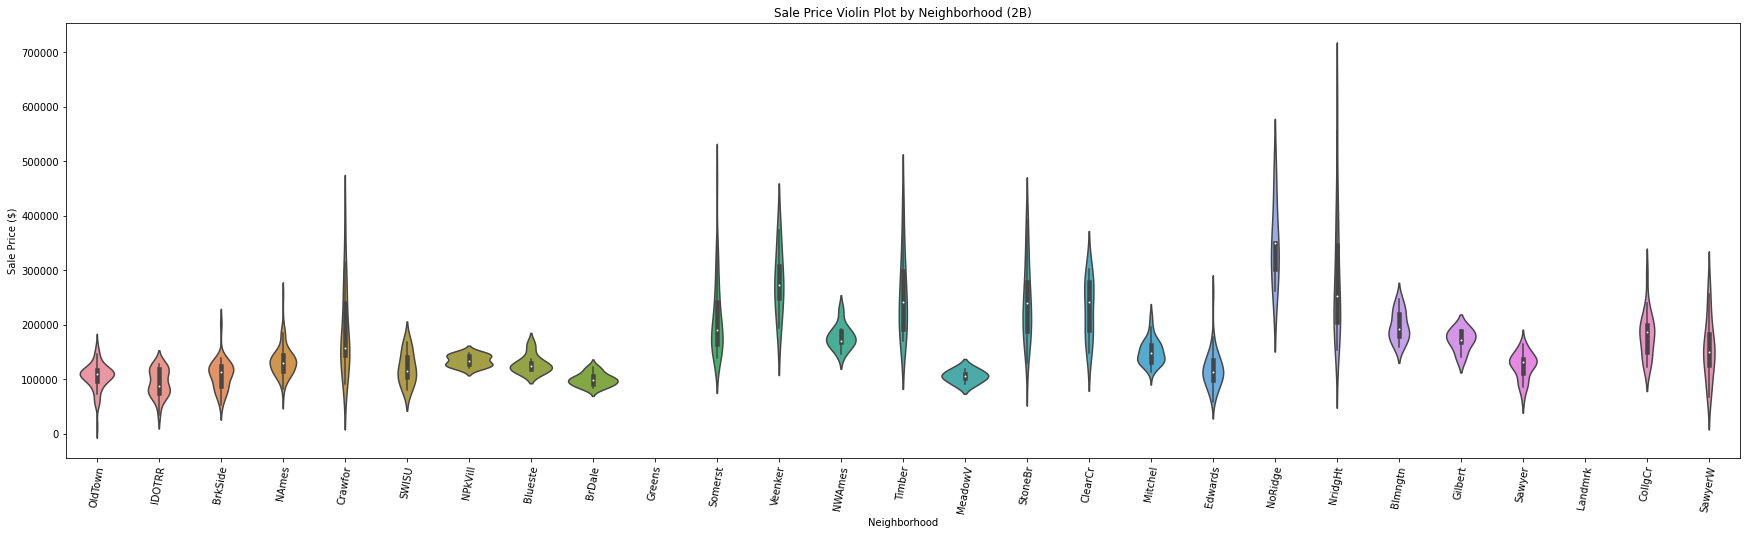

In [133]:
plt.figure(figsize=(30,8)) 
#sns.set(font_scale = 1.6,style='white')
sns.violinplot(x = housing.Neighborhood[housing.BedroomAbvGr == 2], 
               y=housing.SalePrice[housing.BedroomAbvGr == 2],
              order = nbhd)

plt.xlabel('Neighborhood')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Sale Price ($)')
plt.title('Sale Price Violin Plot by Neighborhood (2B)')

plt.show()

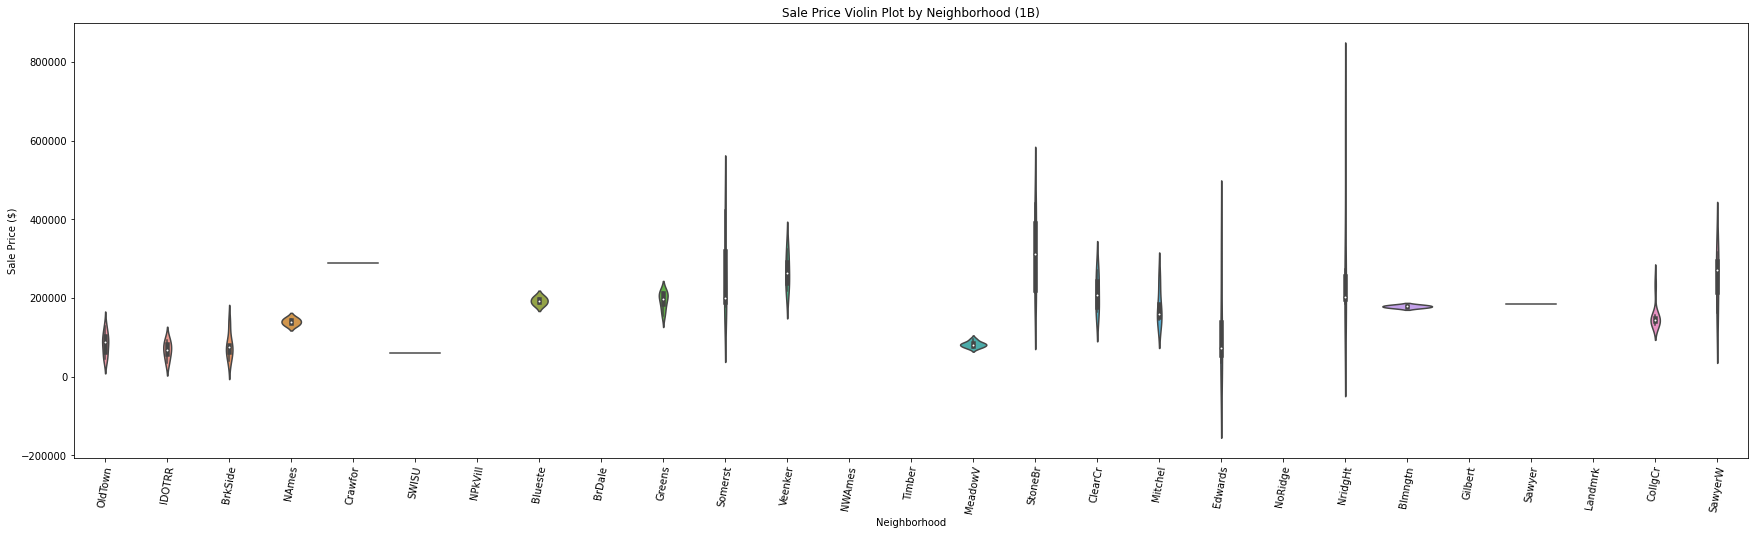

In [134]:
plt.figure(figsize=(30,8)) 
#sns.set(font_scale = 1.6,style='white')
sns.violinplot(x = housing.Neighborhood[housing.BedroomAbvGr == 1], 
               y=housing.SalePrice[housing.BedroomAbvGr == 1],
              order = nbhd)

plt.xlabel('Neighborhood')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Sale Price ($)')
plt.title('Sale Price Violin Plot by Neighborhood (1B)')

plt.show()

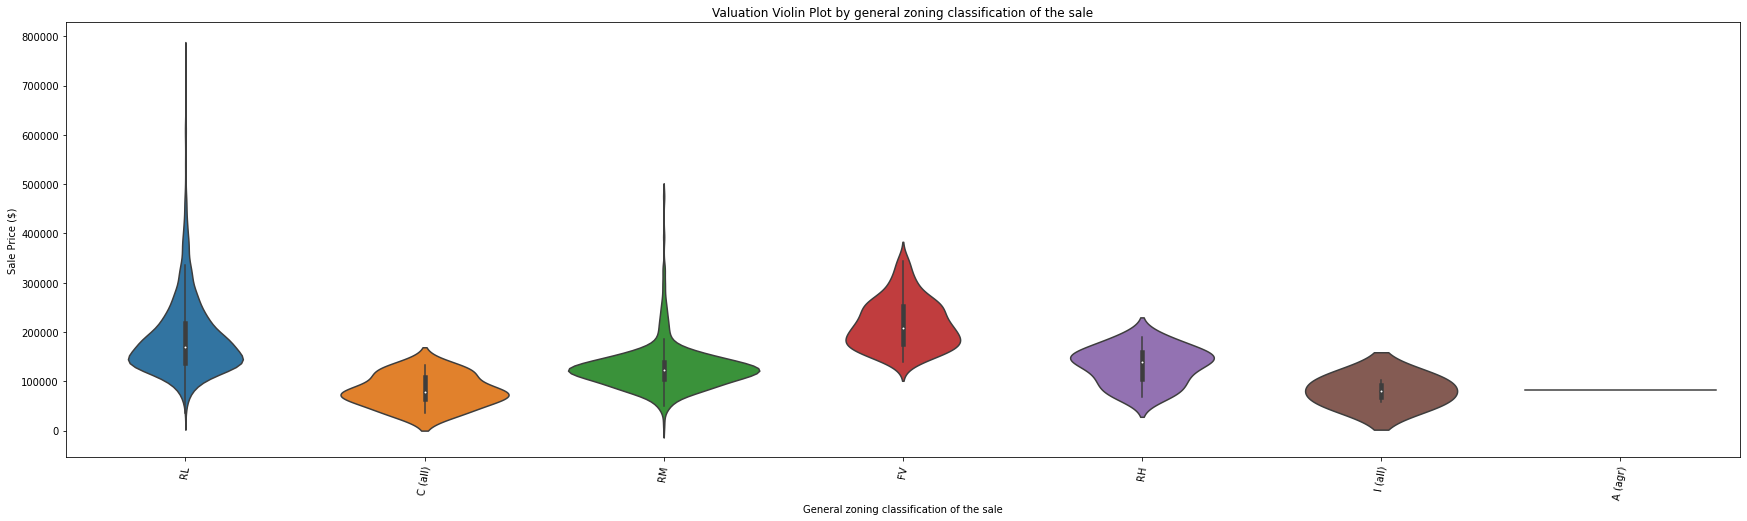

In [135]:
plt.figure(figsize=(30,8)) 
#sns.set(font_scale = 1.6,style='white')
sns.violinplot(x = housing.MSZoning, y=housing.SalePrice)

plt.xlabel('General zoning classification of the sale')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Sale Price ($)')
plt.title('Valuation Violin Plot by general zoning classification of the sale')

plt.show()
#sns.reset_defaults()

1. Ages and sale prices are highly negatively correlated across neighborhoods.
2. Average sale price for floating village residential is the highest.
3. Average sale price for agriculture, commercial and industrial are relatively lower.

### 4. Exterior

In [167]:
exterior

['BldgType',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'Foundation',
 'HouseStyle',
 'MasVnrType',
 'RoofMatl',
 'RoofStyle']

In [168]:
# Count plots of categorical features
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(exterior))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Keep all these exterior features for further exploration and analysis.

### 5. Lot

In [169]:
lot

['Alley',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'PavedDrive',
 'Street',
 'Condition1',
 'Condition2']

In [170]:
housing[lot].dtypes

Alley           object
LandContour     object
LandSlope       object
LotArea          int64
LotConfig       object
LotFrontage    float64
LotShape        object
PavedDrive      object
Street          object
Condition1      object
Condition2      object
dtype: object

In [171]:
lot1, lot2 = classify_features(lot)
lot2

['Alley',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'PavedDrive',
 'Street',
 'Condition1',
 'Condition2']

In [172]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(lot2))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.violinplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [173]:
sns.scatterplot(housing['LotArea'],housing['SalePrice'])

<AxesSubplot: xlabel='LotArea', ylabel='SalePrice'>

<AxesSubplot: xlabel='LotFrontage', ylabel='SalePrice'>

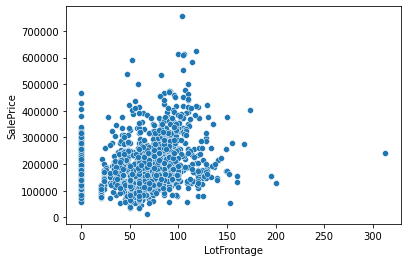

In [174]:
sns.scatterplot(housing['LotFrontage'],housing['SalePrice'])

1. Lot categorical features show relatively low relationships, but keep them for now.
2. Lot numerical features show certain linear relationship with sale price, so keep for further exploration.


### 6. Quality

In [175]:
quality

['BsmtCond',
 'BsmtQual',
 'ExterCond',
 'ExterQual',
 'FireplaceQu',
 'GarageCond',
 'GarageQual',
 'KitchenQual',
 'OverallCond',
 'OverallQual',
 'HeatingQC']

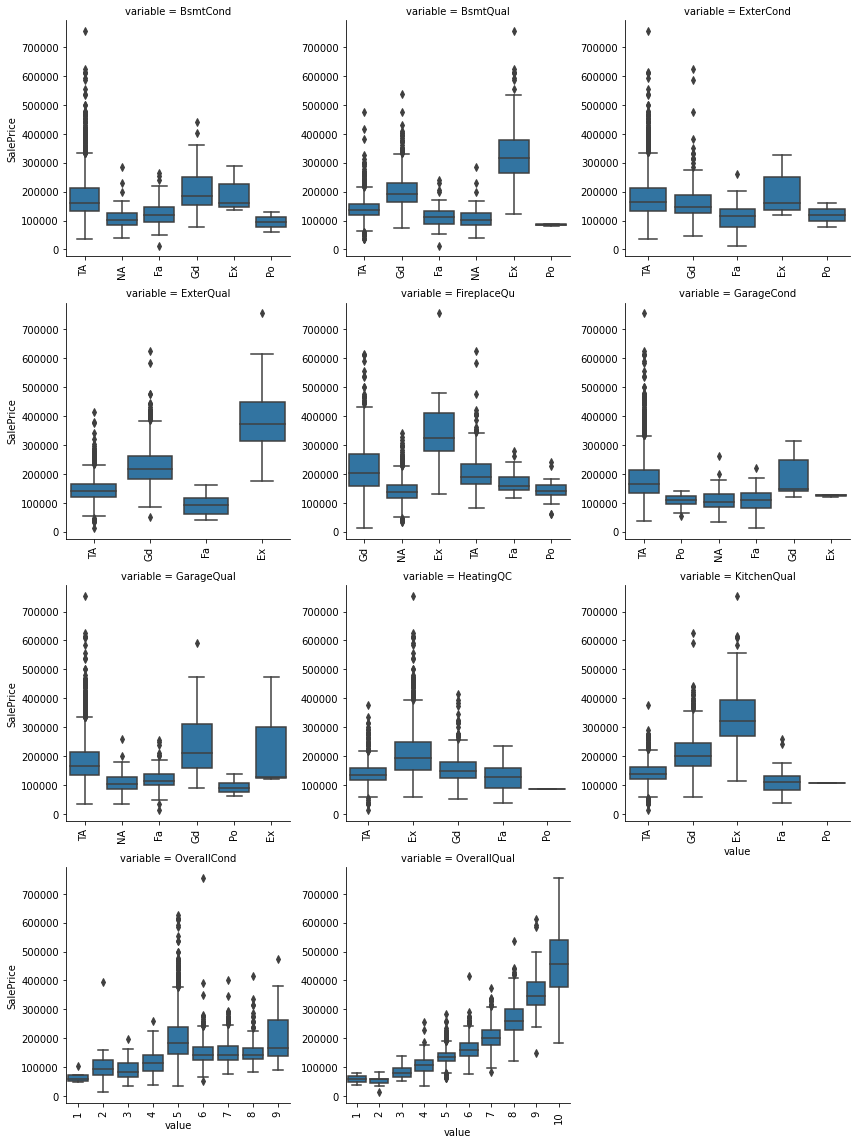

In [176]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(quality))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

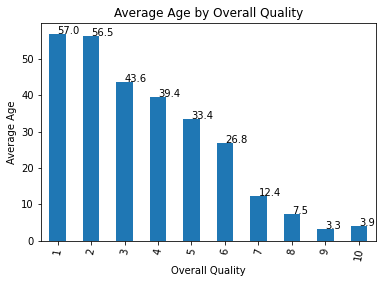

In [177]:
#plt.figure(figsize=(10,6)) 

housing.groupby('OverallQual').Age.mean().plot(kind='bar')

for index, value in enumerate(housing.groupby('OverallQual').Age.mean()):
    plt.text(index,value,str(round(value,1)))


plt.xlabel('Overall Quality')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Average Age')
plt.title('Average Age by Overall Quality')

plt.show()

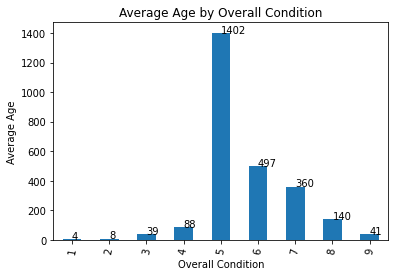

In [178]:
#plt.figure(figsize=(10,6)) 

housing.groupby('OverallCond').Age.count().plot(kind='bar')

for index, value in enumerate(housing.groupby('OverallCond').Age.count()):
    plt.text(index,value,str(round(value,1)))


plt.xlabel('Overall Condition')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Average Age')
plt.title('Average Age by Overall Condition')

plt.show()

1. Overall quality significantly impact the sale price.
2. Overall quality and age are highly correlated.

In [179]:
# rmv.append(OverallQual)

### 7. Size

In [180]:
size

['1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'GrLivArea',
 'LowQualFinSF',
 'MasVnrArea',
 'PoolArea',
 'TotalBsmtSF',
 'WoodDeckSF',
 'LotArea',
 'GarageArea',
 'EnclosedPorch',
 'OpenPorchSF',
 'ScreenPorch',
 '3SsnPorch']

In [181]:
#h1 = housing.copy()
#h1['FlRatio'] = housing['2ndFlrSF']/ housing['1stFlrSF']
#h1['FTotalSF'] = 
(housing['2ndFlrSF'] + housing['1stFlrSF'] + housing['LowQualFinSF'] - housing['GrLivArea']).describe()

#h1.loc[h1.FTotalSF <0].filter(regex='SF$|Area$')

count    2579.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

In [182]:
housing['LowQualFinSFRatio'] = housing['LowQualFinSF']/housing['GrLivArea']
housing['LowQualFinSFRatio'].describe()

count    2579.000000
mean        0.002488
std         0.025176
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.447623
Name: LowQualFinSFRatio, dtype: float64

In [183]:
rmv.append('LowQualFinSF')
rmv.append('1stFlrSF')
rmv.append('2ndFlrSF')

add.append('LowQualFinSFRatio')

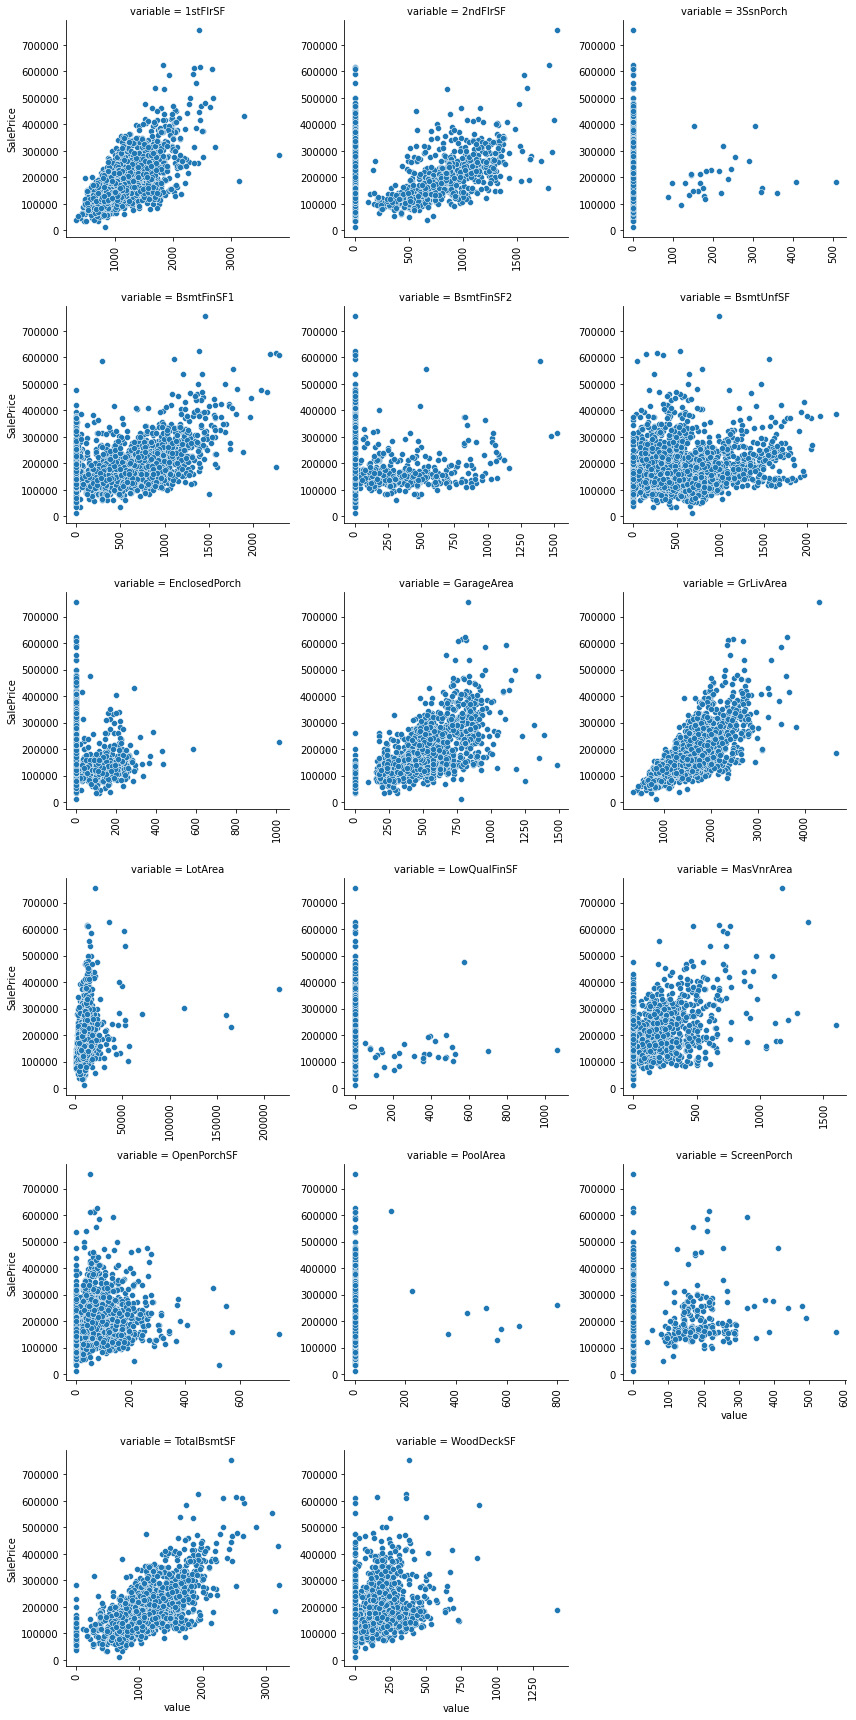

In [184]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(size))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.scatterplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [185]:
'''neiberhrhood
size = 
total_area = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + 
df['GarageArea'] + df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['PoolArea']'''

"neiberhrhood\nsize = \ntotal_area = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + \ndf['GarageArea'] + df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['PoolArea']"

In [186]:
#housing["1stFlrSF"].describe()

In [187]:
# pd.DataFrame(housing["1stFlrSF"] - housing["TotalBsmtSF"]).boxplot()
# (housing["1stFlrSF"] - housing["TotalBsmtSF"]).describe()

In [188]:
#housing[["TotalBsmtSF","1stFlrSF"]]

In [189]:
'''df['has_woodDeck'] = df['WoodDeckSF'] > 0
df['has_openPorch'] = df['OpenPorchSF'] > 0
df['has_enclosedPorch'] = df['EnclosedPorch'] > 0
df['has_3ssnPorch'] = df['3SsnPorch'] > 0
df['has_screenPorch'] = df['ScreenPorch'] > 0
df['has_pool'] = df['PoolArea'] > 0
df['has_basement'] = df['TotalBsmtSF'] > 0'''

"df['has_woodDeck'] = df['WoodDeckSF'] > 0\ndf['has_openPorch'] = df['OpenPorchSF'] > 0\ndf['has_enclosedPorch'] = df['EnclosedPorch'] > 0\ndf['has_3ssnPorch'] = df['3SsnPorch'] > 0\ndf['has_screenPorch'] = df['ScreenPorch'] > 0\ndf['has_pool'] = df['PoolArea'] > 0\ndf['has_basement'] = df['TotalBsmtSF'] > 0"

Keep all size features for further analysis.

### 8. no_of_rooms

In [190]:
no_of_rooms

['BedroomAbvGr',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd']

In [191]:
housing['Bath'] =     housing['FullBath'] + housing['HalfBath']*0.5
housing['BsmtBath'] = housing['BsmtFullBath'] + housing['BsmtHalfBath']*0.5

In [192]:
no_of_rooms1 = [
    'BedroomAbvGr',
    #'BsmtFullBath',
    #'BsmtHalfBath',
    "BsmtBath", #
    #'FullBath',
    #'HalfBath',
    "Bath", #
    'KitchenAbvGr',
    'TotRmsAbvGrd']

add.append("BsmtBath")
add.append("Bath")

rmv.append('BsmtFullBath')
rmv.append('BsmtHalfBath')
rmv.append('FullBath')
rmv.append('HalfBath')

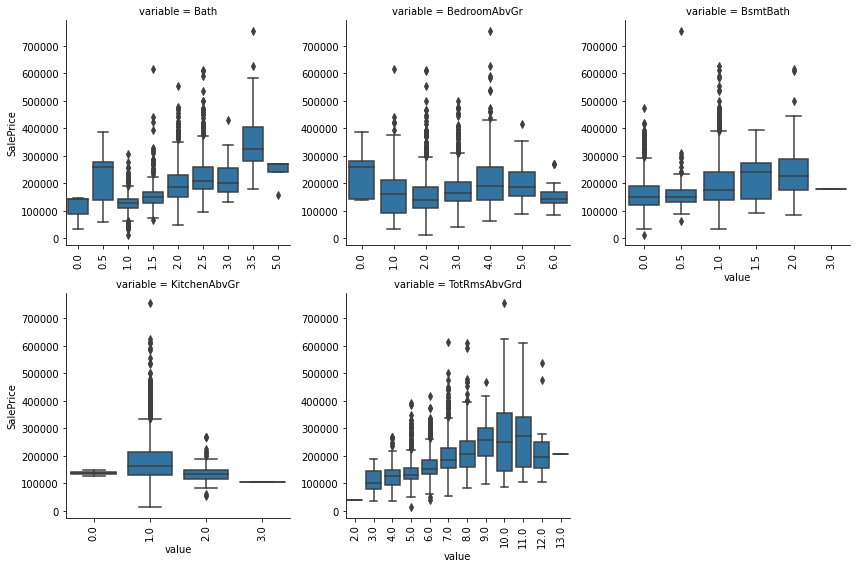

In [193]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(no_of_rooms1))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Keep all room number features for further analysis.

### 9. basement

In [194]:
basement

['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [195]:
housing[basement].dtypes

BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
dtype: object

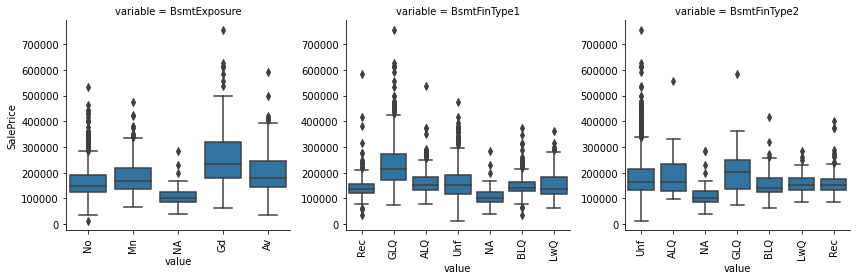

In [196]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(basement))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Keep all basement features for further analysis.

### 10. others

In [197]:
others

['FireplaceQu',
 'Fireplaces',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageFinish',
 'GarageType',
 'MiscFeature',
 'MiscVal',
 'MSSubClass',
 'PoolQC']

In [198]:
#housing[others].dtypes

In [199]:
#others_n = ['Fireplaces','GarageArea','GarageCars','MiscVal','MSSubClass']
others_n, others_c = classify_features(others)
print(others_n)
print(others_c)

['Fireplaces', 'GarageArea', 'GarageCars', 'MiscVal', 'MSSubClass']
['FireplaceQu', 'Functional', 'GarageFinish', 'GarageType', 'MiscFeature', 'PoolQC']


***Fireplaces***

In [200]:
# Fireplaces
housing.Fireplaces.value_counts()

0    1241
1    1131
2     195
3      11
4       1
Name: Fireplaces, dtype: int64

In [201]:
#plt.figure(figsize=(20,6)) 

#pd.Series(data = housing.groupby('Fireplaces').SalePrice.mean()).plot(kind='bar')
housing.groupby('Fireplaces').SalePrice.mean().plot(kind='bar')

for index, value in enumerate(housing.groupby('Fireplaces').SalePrice.mean()):
    plt.text(index,value,str(round(value,1)))


plt.xlabel('No. of Fireplaces')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Avg Sale Price ($)')
plt.title('Average Sale Price by No. of Fireplaces')

plt.show()

In [202]:
#plt.figure(figsize=(20,6)) 

#pd.Series(data = housing.groupby('Fireplaces').SalePrice.mean()).plot(kind='bar')
housing.groupby('FireplaceQu').SalePrice.mean().plot(kind='bar')

for index, value in enumerate(housing.groupby('FireplaceQu').SalePrice.mean()):
    plt.text(index,value,str(round(value,1)))


plt.xlabel('Fireplaces quality')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Avg Sale Price ($)')
plt.title('Average Sale Price by Fireplaces quality')

plt.show()

***Pool***

In [203]:
housing.PoolQC.value_counts()

NA    2570
TA       3
Fa       2
Ex       2
Gd       2
Name: PoolQC, dtype: int64

In [204]:
#plt.figure(figsize=(20,6)) 

#pd.Series(data = housing.groupby('Fireplaces').SalePrice.mean()).plot(kind='bar')
housing.groupby('PoolQC').SalePrice.mean().plot(kind='bar')

for index, value in enumerate(housing.groupby('PoolQC').SalePrice.mean()):
    plt.text(index,value,str(round(value,1)))


plt.xlabel('Pool quality')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Avg Sale Price ($)')
plt.title('Average Sale Price by Pool quality')

plt.show()

***Others - All***

In [205]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(others_n))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.scatterplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [206]:
rmv.append("MSSubClass")

1. Even through MSSubClass is numerical, it's actually categorical of which info is reflected in other features. Drop it.

In [207]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(others_c))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.violinplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

### 11. utility

In [208]:
utility

['CentralAir', 'Electrical', 'Heating', 'HeatingQC', 'Utilities']

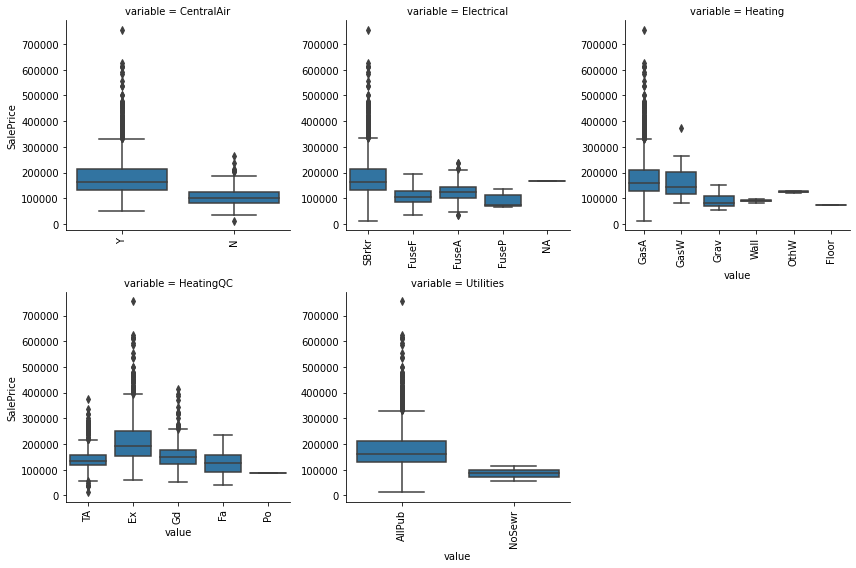

In [209]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(utility))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Keep all utility features for further analysis.

### 12. garage

In [210]:
garage

['GarageYrBlt',
 'GarageArea',
 'GarageCars',
 'GarageFinish',
 'GarageType',
 'GarageCond',
 'GarageQual']

In [211]:
garage_n, garage_c = classify_features(garage)

***GarageYrBlt --> Garage Age***

In [212]:
housing['GarageAge'] = housing.YrSold - housing.GarageYrBlt

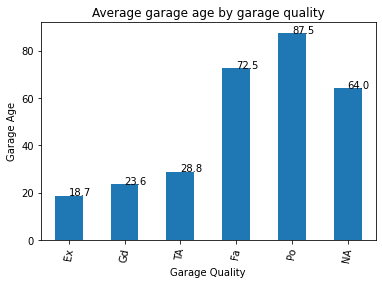

In [213]:
#plt.figure(figsize=(20,6)) 
qualord=['Ex','Gd','TA','Fa','Po','NA']

pd.Series(data = housing.groupby('GarageQual').GarageAge.mean(), index = qualord).plot(kind="bar")

for index, value in enumerate(pd.Series(data = housing.groupby('GarageQual').GarageAge.mean(), index = qualord)):
    plt.text(index,value,str(round(value,1)))


plt.xlabel('Garage Quality')#,rotation = 45)
plt.xticks(rotation=80)
plt.ylabel('Garage Age')
plt.title('Average garage age by garage quality')

plt.show()

In [214]:
rmv.append('GarageYrBlt')
rmv.append('GarageAge')

Convert GarageYrBuilt to GarageAge. GarageAge is highly correlated with GarageQuality.

Thus, remove GarageYrBuilt and use GarageQual.

In [215]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(garage_n))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.scatterplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

0.8895187808138098


<AxesSubplot: xlabel='GarageArea', ylabel='GarageCars'>

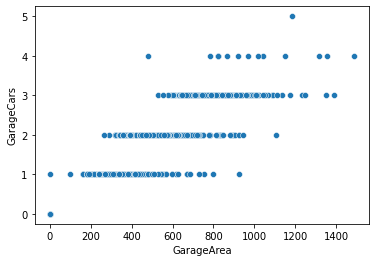

In [216]:
print(housing["GarageArea"].corr(housing["GarageCars"]))
sns.scatterplot(x=housing["GarageArea"],
               y=housing["GarageCars"])

In [217]:
housing.GarageArea.corr(housing.GarageCars)

0.8895187808138098

In [218]:
rmv.append("GarageArea") # highly correlated, remove garage area and keep garage cars

GarageArea is highly correlated with GarageCars.

Thus, drop GarageArea and keep GarageCars.

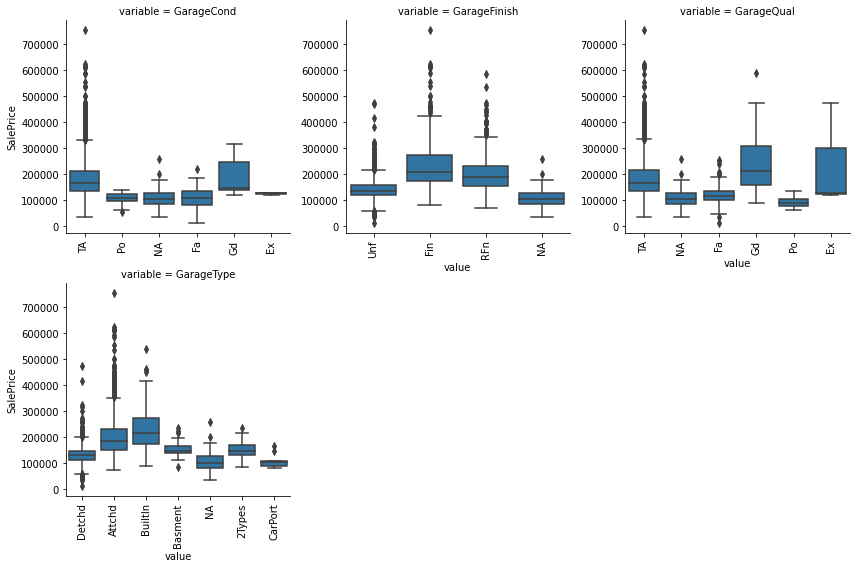

In [219]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(garage_c))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [220]:
### checkpoint ###

In [221]:
print(len(add))
add

4


['Age', 'LowQualFinSFRatio', 'BsmtBath', 'Bath']

In [222]:
print(len(rmv))
rmv

13


['YearBuilt',
 'YearRemodAdd',
 'LowQualFinSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'MSSubClass',
 'GarageYrBlt',
 'GarageAge',
 'GarageArea']

## Part III- Feature Selection & Feature Engineering

In [241]:
housing_full = housing.copy() # save a full copy before selecting features
#housing = housing_full.copy()

In [242]:
housing.shape

(2579, 86)

**Types of features**

**1. numerical**

**2. categorical**
  * ordinal (need to convert to numerical)
  * nominal

In [243]:
def get_feature_groups():

    # Numerical Features
    feature_num = housing.select_dtypes(include=['int64','float64']).columns
    #feature_num = feature_num.drop(['PID','SalePrice'])
    feature_num = feature_num.drop(['PID'])

    # Categorical Features
    features_cat = housing.select_dtypes(include=['object']).columns
    
    return list(feature_num), list(features_cat)

In [244]:
# Alley
housing.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)
                      
# Lot Shape
housing.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
housing.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
housing.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope
housing.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
housing.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
housing.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
housing.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
housing.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
housing.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
housing.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
housing.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
housing.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
housing.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
housing.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
housing.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
housing.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
housing.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
housing.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
housing.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# We'll set all missing values in our newly converted features to 0
features_CattoNum = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']
#housing[features_CattoNum] = housing[features_CattoNum].fillna(0)
housing.replace({'NA':0}, inplace=True)

print(len(features_CattoNum))

21


In [245]:
# save a copy of all ordinal transformed features
housing_full_ordtransformed = housing.copy()

In [246]:
rmv

['YearBuilt',
 'YearRemodAdd',
 'LowQualFinSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'MSSubClass',
 'GarageYrBlt',
 'GarageAge',
 'GarageArea']

In [247]:
# Removed features
housing = housing.drop(rmv, axis=1)
print(housing.shape)

(2579, 73)


In [248]:
# List of numerical and categorical features
feature_num, feature_cat = get_feature_groups()

In [249]:
print(len(feature_num))
print(len(feature_cat))

50
22


### I. Numeric

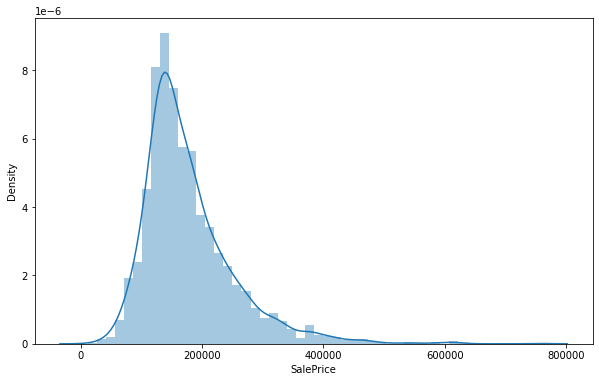

In [250]:
# SalePrice
plt.figure(figsize=(10,6))
sns.distplot(housing.SalePrice)
plt.show()

In [251]:
'''# SalePrice
plt.figure(figsize=(20,10))
sns.histplot(housing.SalePrice)
plt.show()'''

'# SalePrice\nplt.figure(figsize=(20,10))\nsns.histplot(housing.SalePrice)\nplt.show()'

In [252]:
'''# SalePrice
plt.figure(figsize=(10,16))
sns.displot(housing.SalePrice)
plt.show()'''

'# SalePrice\nplt.figure(figsize=(10,16))\nsns.displot(housing.SalePrice)\nplt.show()'

In [253]:
'''sns.distplot(housing['SalePrice'][housing['SalePrice'].notnull()])'''

"sns.distplot(housing['SalePrice'][housing['SalePrice'].notnull()])"

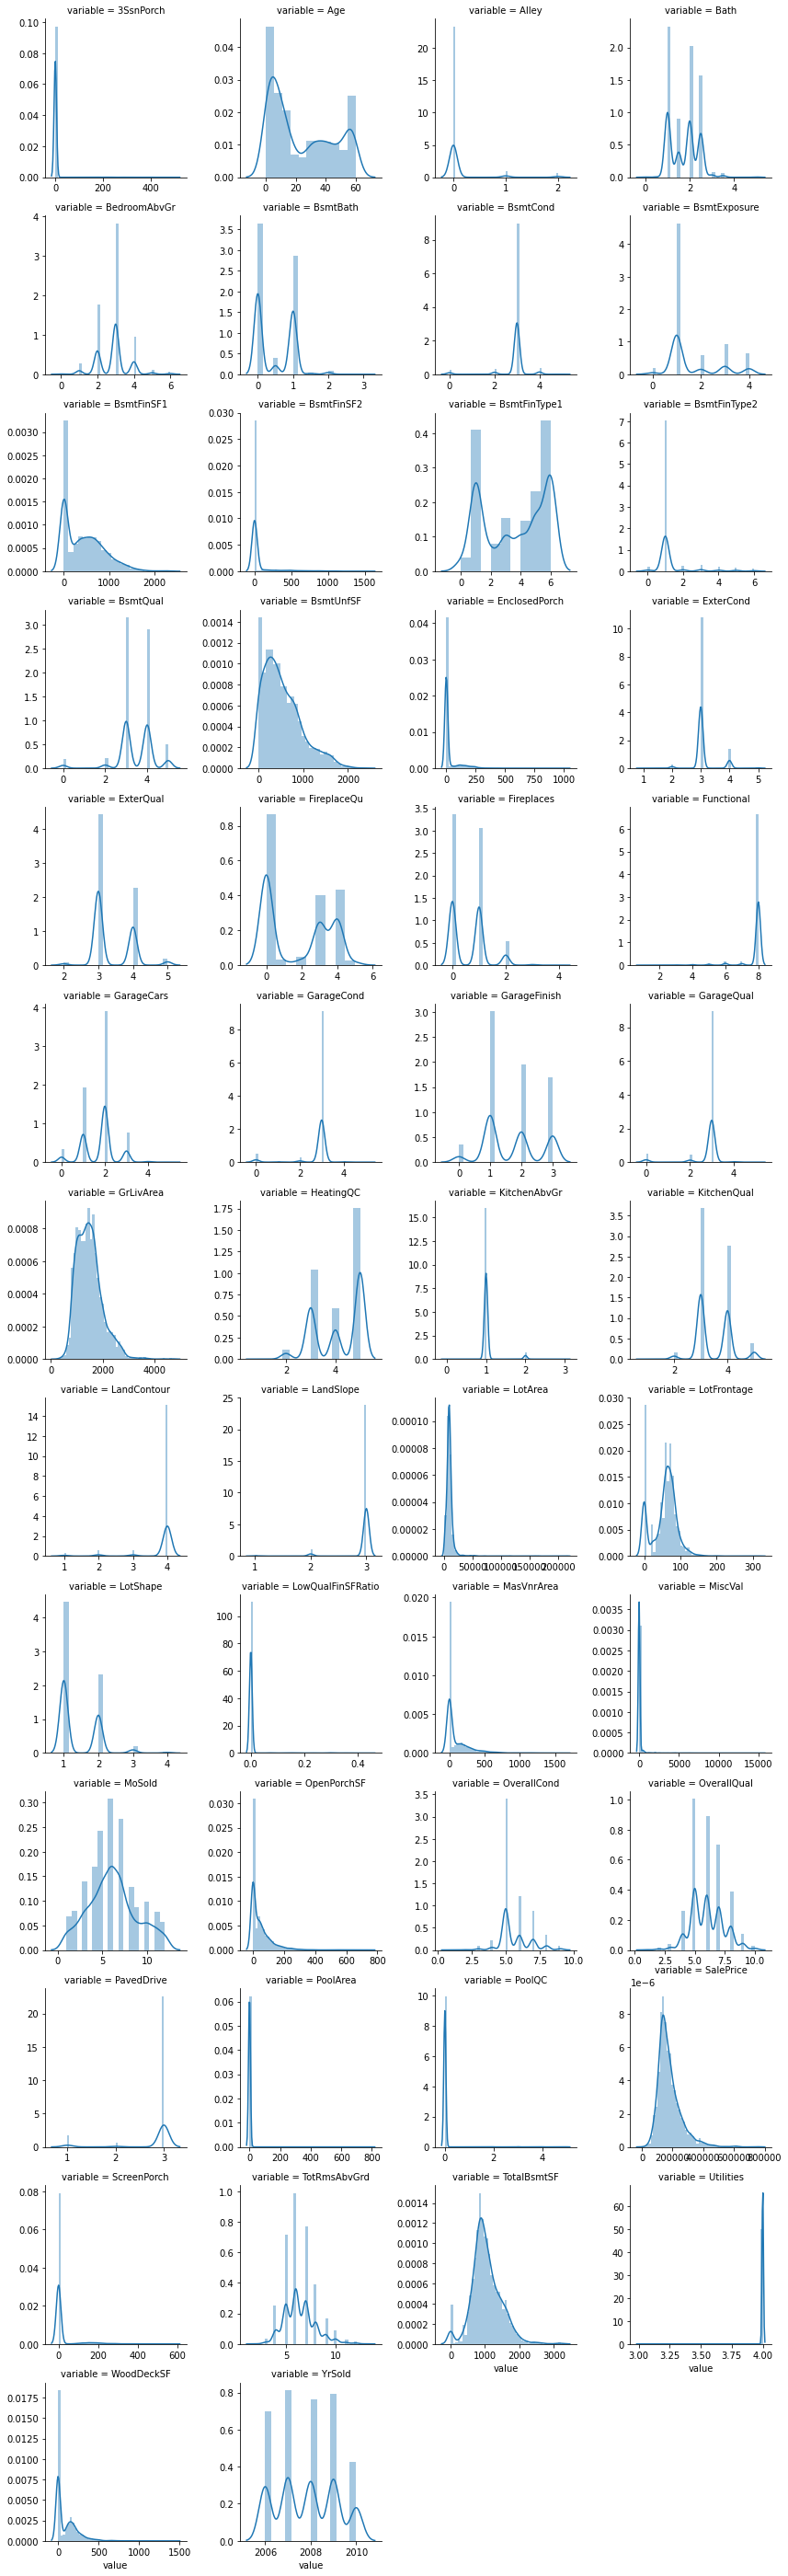

In [254]:
# All the numerical features
f = pd.melt(housing, value_vars=sorted(feature_num))
#g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [255]:
'''import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.plotting import scatterplotmatrix


X, y = iris_data()
scatterplotmatrix(X, figsize=(10, 8))
plt.tight_layout()
plt.show()'''

'import matplotlib.pyplot as plt\nfrom mlxtend.data import iris_data\nfrom mlxtend.plotting import scatterplotmatrix\n\n\nX, y = iris_data()\nscatterplotmatrix(X, figsize=(10, 8))\nplt.tight_layout()\nplt.show()'

In [256]:
'''import matplotlib.pyplot as plt
#from mlxtend.data import iris_data
from mlxtend.plotting import scatterplotmatrix


#X, y = iris_data()

#DataFrame.to_numpy(dtype=None, copy=False, na_value=_NoDefault.no_default)[source]

X = housing[feature_num[1:5]].to_numpy()
names=housing[feature_num[1:5]].columns
#y = housing.SalePrice

scatterplotmatrix(X, figsize=(20, 16), names=names)
plt.tight_layout()
plt.show()'''

'import matplotlib.pyplot as plt\n#from mlxtend.data import iris_data\nfrom mlxtend.plotting import scatterplotmatrix\n\n\n#X, y = iris_data()\n\n#DataFrame.to_numpy(dtype=None, copy=False, na_value=_NoDefault.no_default)[source]\n\nX = housing[feature_num[1:5]].to_numpy()\nnames=housing[feature_num[1:5]].columns\n#y = housing.SalePrice\n\nscatterplotmatrix(X, figsize=(20, 16), names=names)\nplt.tight_layout()\nplt.show()'

#### I. Multicollinearity analysis

In [257]:
import plotly.express as px

def correlation_matrices(df):
    plt.figure(figsize=(20,20))
    #fig = px.scatter_matrix(df)
    #fig.show()
    df = housing[df]
    corr = df.corr()
    corr.style.background_gradient(cmap='coolwarm')
    
    sns.set(rc = {'figure.figsize':(16,8)})
    sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

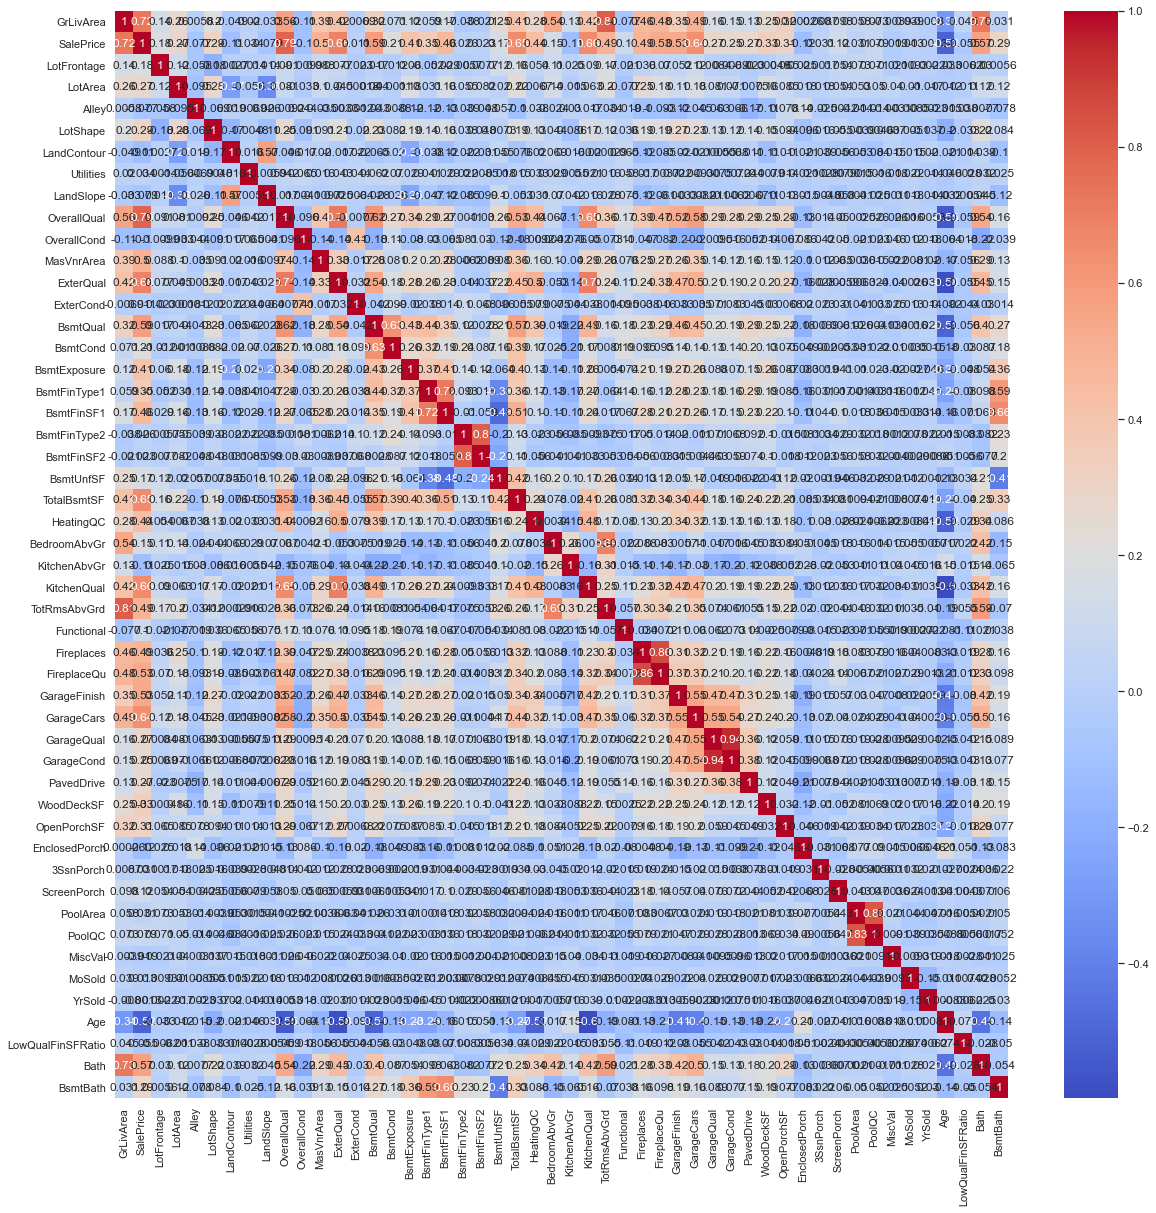

In [258]:
#plt.figure(figsize=(20,20))
correlation_matrices(feature_num)

In [259]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(housing[feature_num], .6 )

BsmtQual      OverallQual     0.622998
BsmtCond      BsmtQual        0.632228
GarageCars    SalePrice       0.639016
SalePrice     TotalBsmtSF     0.652540
KitchenQual   OverallQual     0.653743
SalePrice     KitchenQual     0.655256
BsmtBath      BsmtFinSF1      0.656171
SalePrice     ExterQual       0.682589
TotRmsAbvGrd  BedroomAbvGr    0.693548
ExterQual     KitchenQual     0.697743
              OverallQual     0.714085
BsmtFinType1  BsmtFinSF1      0.715658
GrLivArea     SalePrice       0.719980
Bath          GrLivArea       0.725083
OverallQual   SalePrice       0.790661
BsmtFinType2  BsmtFinSF2      0.802110
GrLivArea     TotRmsAbvGrd    0.807432
PoolArea      PoolQC          0.827291
FireplaceQu   Fireplaces      0.859503
GarageQual    GarageCond      0.940908
GrLivArea     GrLivArea            NaN
dtype: float64

Drop highly correlated quality features to avoid multicollinearity for MLR:

In [260]:
'''for q in quality:
    print(q)
    print(housing.Age.corr(housing[q]))'''

'for q in quality:\n    print(q)\n    print(housing.Age.corr(housing[q]))'

In [261]:
rmv_corr = []
rmv_corr.append("BsmtQual")
rmv_corr.append("ExterQual")
rmv_corr.append("KitchenQual")
#rmv_corr.append("OverallQual")
#rmv_corr.append("HeatingQC")
rmv_corr.append("KitchenQual")

In [262]:
#print(housing.OverallCond.value_counts())
#print(housing.BsmtCond.value_counts())
print(housing.GarageCond.value_counts())

3    2355
0     129
2      67
4      14
1      11
5       3
Name: GarageCond, dtype: int64


In [263]:
#rmv_corr.append("BsmtCond")
rmv_corr.append("GarageCond")

In [264]:
#correlation_matrices(quality)

#### II. Univariate Analysis

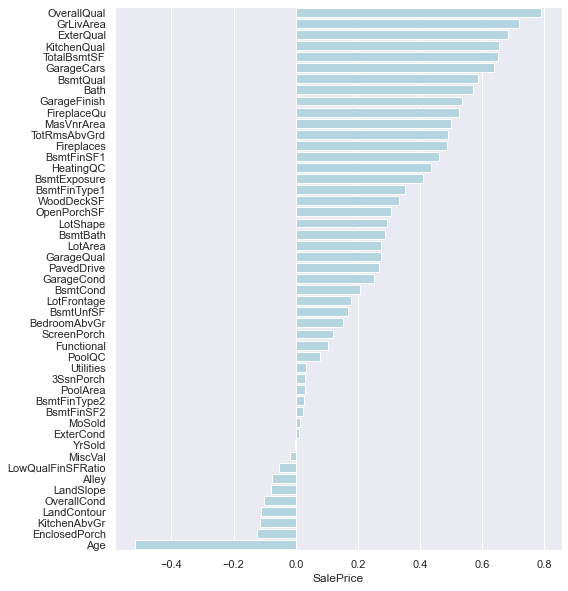

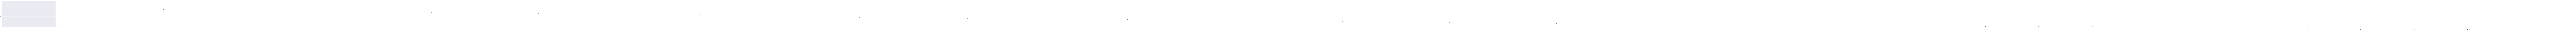

In [265]:
# Correlation between numerical features

corr = housing[feature_num].corr()

corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h', color="lightblue")
plt.show()


for index, value in enumerate(corr.SalePrice[1:]):
    plt.text(index,value,str(round(value,1)))

In [266]:
housing[feature_num].corr()["SalePrice"].sort_values(ascending=False)[np.abs(housing[feature_num].corr()["SalePrice"].sort_values(ascending=False))<0.05]

Utilities       0.034063
3SsnPorch       0.031269
PoolArea        0.030849
BsmtFinType2    0.025520
BsmtFinSF2      0.022694
MoSold          0.012725
ExterCond       0.011291
YrSold         -0.001261
MiscVal        -0.018869
Name: SalePrice, dtype: float64

In [267]:
# 0.05
low_corr = ["Utilities",
            "3SsnPorch",
            "PoolArea",
            "BsmtFinType2",
           "BsmtFinSF2",
           "MoSold",
           "ExterCond",
           "YrSold",
           "MiscVal"]
for f in low_corr:
    rmv_corr.append(f)

In [268]:
len(low_corr)

9

In [269]:
#rmv_corr
len(rmv_corr)

14

In [270]:
# save a copy of features before dropping
feature_num1 = feature_num
feature_cat1 = feature_cat

housing = housing.drop(rmv_corr,axis=1)

In [271]:
feature_num, feature_cat = get_feature_groups()
feature_num2 = feature_num
feature_cat2 = feature_cat

In [272]:
print(len(feature_num1))
len(feature_num)

50


37

#### Log transformation

**Threshold**: skewness over 0.7
**exclude features** that are:
1. label-encoded
2. quality
3. no of rooms

In [273]:
#features_CattoNum

In [274]:
len(feature_num)

37

In [275]:
list_1 = feature_num.copy()
list_2 = features_CattoNum.copy()

In [276]:
list_3 = list_1.copy()

for element in list_1:
    if element in list_2:
        list_3.remove(element)

len(list_3)

23

In [277]:
housing[list_3].skew()

GrLivArea             0.980512
SalePrice             1.760751
LotFrontage          -0.084632
LotArea              13.071928
OverallQual           0.186417
OverallCond           0.625018
MasVnrArea            2.673506
BsmtFinSF1            0.803638
BsmtUnfSF             0.962033
TotalBsmtSF           0.509983
BedroomAbvGr          0.253143
KitchenAbvGr          4.530244
TotRmsAbvGrd          0.669474
Fireplaces            0.735838
GarageCars           -0.190980
WoodDeckSF            1.846553
OpenPorchSF           2.604851
EnclosedPorch         4.040923
ScreenPorch           3.996664
Age                   0.441856
LowQualFinSFRatio    11.706920
Bath                  0.314900
BsmtBath              0.450578
dtype: float64

In [278]:
# GrLivArea         0.980512 *
# SalePrice         1.760751 *
# LotFrontage      -0.084632 
# LotArea          13.071928 *
# OverallQual           0.186417
# OverallCond       0.625018 
# MasVnrArea        2.673506 *
# BsmtFinSF1        0.803638 *
# BsmtUnfSF         0.962033 *
# TotalBsmtSF       0.509983 
## 1stFlrSF          1.043449 *
## 2ndFlrSF          0.821994 *
# BedroomAbvGr      0.253143
# KitchenAbvGr      4.530244
# TotRmsAbvGrd      0.669474
# Fireplaces        0.735838
# GarageCars       -0.190980
# WoodDeckSF        1.846553 *
# OpenPorchSF       2.604851 *
# EnclosedPorch     4.040923 *
# ScreenPorch       3.996664 *
# Age               0.441856
# LowQualFinSFRatio    11.706920
# Bath              0.314900
# BsmtBath          0.450578

In [279]:
f_log = ["GrLivArea",
"SalePrice",
#"LotFrontage",
"LotArea",
#"MasVnrArea",
#"BsmtFinSF1",
#"BsmtUnfSF",
#"1stFlrSF",
#"2ndFlrSF",
#"WoodDeckSF",
#"OpenPorchSF",
#"EnclosedPorch",
#"ScreenPorch"
] 

# no zeros

In [280]:
f_log

['GrLivArea', 'SalePrice', 'LotArea']

#### B. Categorical

In [281]:
len(feature_cat)

22

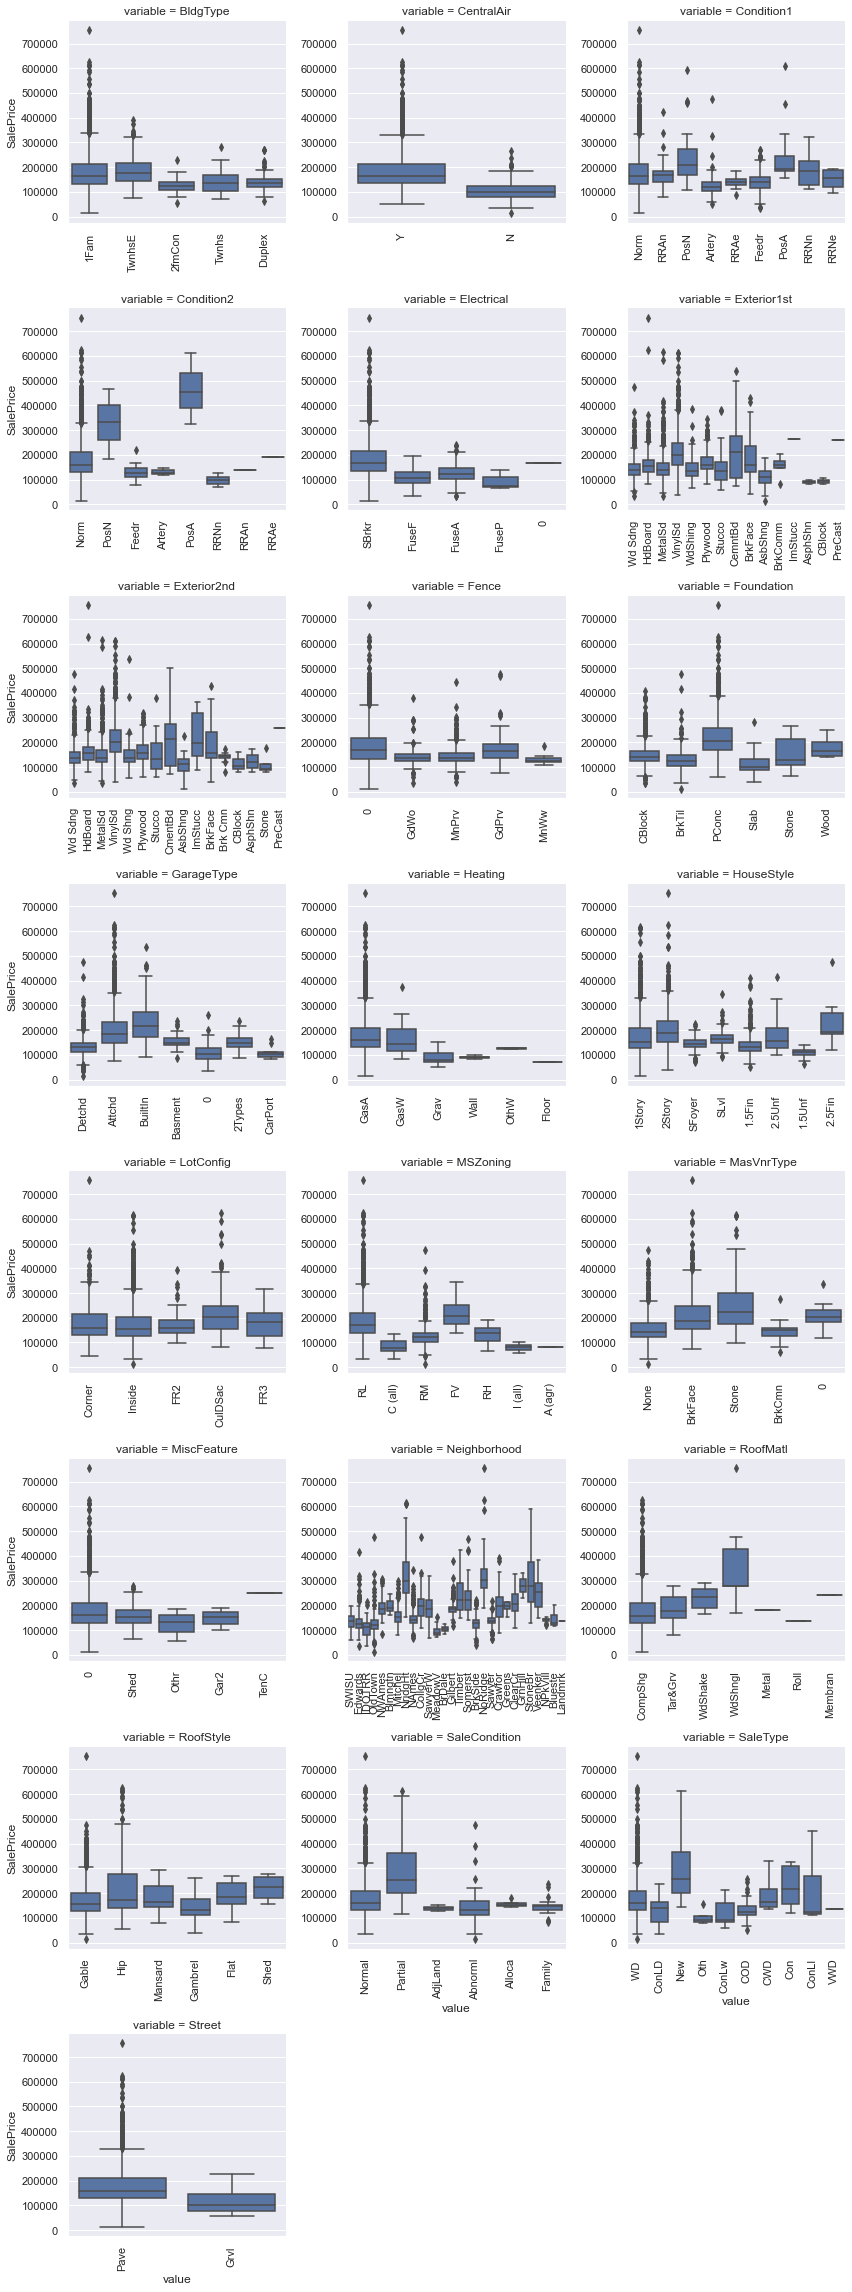

In [282]:
# Count plots of categorical features
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(feature_cat))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

### 2. Feature engineering

(1). **Age** = YrSold - YearRemodAdd

(2). **GarageAge** = YrSold - GarageYrBlt

(3). **Bath** = FullBath + HalfBath(0.5)

(4). **BsmtBath** = BsmtFullBath + BsmtHalfBath(0.5)

(5). **LowQualFinSFRatio** = LowQualFinSF/GrLivArea

## Part IV - Modeling

1. coeffiients
2. feature importance
3. overfitting
4. model performance (also for model comparison)

### Prepare data

In [283]:
len(feature_num)

37

In [284]:
print(housing.shape) # 37(PRICE)+22+PID

(2579, 60)


In [285]:
housing_cleaned = housing.drop(['PID','SalePrice'], axis=1)
print(housing_cleaned.shape)

(2579, 58)


In [286]:
saleprice.shape #= housing['SalePrice']

(2579,)

### Log Tranformation

In [287]:
# y
saleprice_log = np.log(saleprice)

In [288]:
# x
housing_log = housing_cleaned.copy()
f_log.remove("SalePrice")
housing_log[f_log] = housing_log[f_log].apply(np.log, axis=1)
print(housing_log.shape)

(2579, 58)


In [289]:
#housing.GrLivArea

In [290]:
#housing_log.GrLivArea

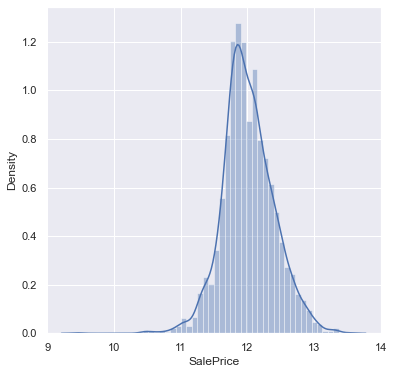

In [291]:
plt.figure(figsize=(6,6))
sns.distplot(saleprice_log)
plt.show()

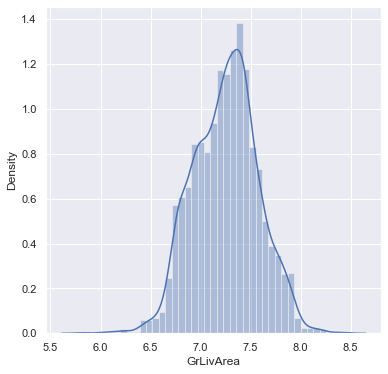

In [292]:
plt.figure(figsize=(6,6))
sns.distplot(housing_log.GrLivArea)
plt.show()

### Dummification

There are 22 categorical variables:

In [293]:
print(len(feature_cat))
#feature_cat

22


In [294]:
housing_cleaned_d = pd.get_dummies(housing_log, drop_first=True) # for linear model
housing_cleaned_nd = housing_log.copy() # for non-linear model

print(housing_cleaned_d.shape)
print(housing_cleaned_nd.shape)

(2579, 187)
(2579, 58)


In [295]:
'''pd.set_option('display.max_columns', 500)
print(housing_log.describe())'''

"pd.set_option('display.max_columns', 500)\nprint(housing_log.describe())"

### Train-test-split

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    housing_cleaned_d, 
    saleprice, 
    test_size=0.3, # train_size=0.7
    #stratify=churn_label, # specify the column to stratify, can do so based on multiple columns
    random_state=413) # set random state to make sure we are get same results

print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(1805, 187)
(774, 187)
(1805,)
(774,)


In [298]:
'''X_train2, X_test2, y_train2, y_test2 = train_test_split(
    housing_cleaned_nd, 
    saleprice, 
    test_size=0.3, # train_size=0.7
    #stratify=churn_label, # specify the column to stratify, can do so based on multiple columns
    random_state=413) # set random state to make sure we are get same results

print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)'''

'X_train2, X_test2, y_train2, y_test2 = train_test_split(\n    housing_cleaned_nd, \n    saleprice, \n    test_size=0.3, # train_size=0.7\n    #stratify=churn_label, # specify the column to stratify, can do so based on multiple columns\n    random_state=413) # set random state to make sure we are get same results\n\nprint(X_train2.shape)\nprint(X_test2.shape)\nprint(y_train2.shape)\nprint(y_test2.shape)'

### Modeling

### ***I. Linear***

### 1. linear regression

In [299]:
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
from sklearn import metrics

lm1 = LinearRegression()
#lm.fit(X_train, np.log(y_train))
lm1.fit(X_train1, y_train1,)
#residuals = weights - lm.predict(birthFeatures)
#plt.hist(residuals)

LinearRegression()

In [300]:
lm1.score(X_train1, y_train1)

0.9133215841119784

In [301]:
#lm.score(X_train1, y_train1)

###### valuation - 1.linear ######
# Predict
y_pred = lm1.predict(X_test1)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

# r2_score
print(metrics.r2_score(lm1.predict(X_test1), y_test1))

24684.18503405079
0.8781578593951032


In [302]:
'''coef = pd.Series(lm1.coef_, index = X_test1.columns)

imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (10, 40)
imp_coef.plot(kind = "barh")
plt.title("Feature Importance")'''

'coef = pd.Series(lm1.coef_, index = X_test1.columns)\n\nimp_coef = coef.sort_values()\nmatplotlib.rcParams[\'figure.figsize\'] = (10, 40)\nimp_coef.plot(kind = "barh")\nplt.title("Feature Importance")'

### 2. 　Ridge

In [303]:
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale

In [304]:
parameters = {
    'alpha': np.arange(0.0001, 1, 0.001),
    #'solver': ['svd', 'cholesky', 'sparse_cg', 'lsqr', 'sag'],
}

ridge1 = GridSearchCV(Ridge(random_state=413,normalize=True),parameters)
ridge1.fit(X_train1, y_train1)

GridSearchCV(estimator=Ridge(normalize=True, random_state=413),
             param_grid={'alpha': array([1.000e-04, 1.100e-03, 2.100e-03, 3.100e-03, 4.100e-03, 5.100e-03,
       6.100e-03, 7.100e-03, 8.100e-03, 9.100e-03, 1.010e-02, 1.110e-02,
       1.210e-02, 1.310e-02, 1.410e-02, 1.510e-02, 1.610e-02, 1.710e-02,
       1.810e-02, 1.910e-02, 2.010e-02, 2.110e-02, 2.210e-02, 2.310e-02,
       2.410e-02, 2.510e-02, 2...
       9.601e-01, 9.611e-01, 9.621e-01, 9.631e-01, 9.641e-01, 9.651e-01,
       9.661e-01, 9.671e-01, 9.681e-01, 9.691e-01, 9.701e-01, 9.711e-01,
       9.721e-01, 9.731e-01, 9.741e-01, 9.751e-01, 9.761e-01, 9.771e-01,
       9.781e-01, 9.791e-01, 9.801e-01, 9.811e-01, 9.821e-01, 9.831e-01,
       9.841e-01, 9.851e-01, 9.861e-01, 9.871e-01, 9.881e-01, 9.891e-01,
       9.901e-01, 9.911e-01, 9.921e-01, 9.931e-01, 9.941e-01, 9.951e-01,
       9.961e-01, 9.971e-01, 9.981e-01, 9.991e-01])})

In [305]:
ridge1.best_params_

{'alpha': 0.29009999999999997}

In [306]:
ridge1.score(X_train1, y_train1)

0.9010617501716797

In [307]:
# valuation - 1.linear

# Predict
#y_pred = lm.predict(X_train1)
y_pred = ridge1.predict(X_test1)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

# r2_score
print(metrics.r2_score(ridge1.predict(X_test1), y_test1))

24950.007721941824
0.8595779492546662


In [308]:
# 192957.74327213093
# 0.8965142285157693

# 23255.24274188867
# 0.8965142285157693

# 24583.734868924083
# 0.8965142285157693

Text(0.5, 1.0, 'Lasso Model Feature Importance')

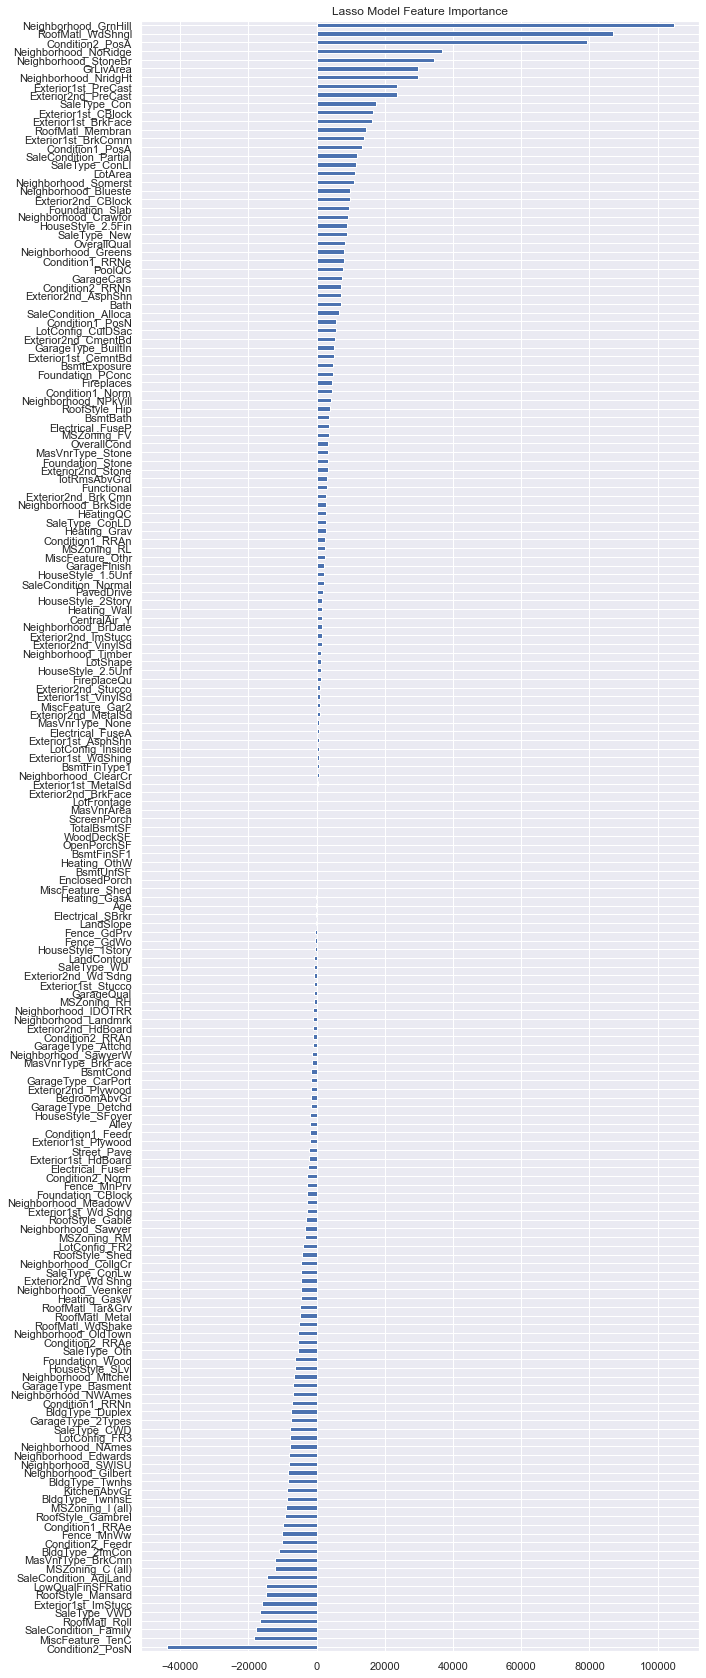

In [351]:
# mod = lm.ridge(y_train1 ~ x_train1.,  lambda = seq(0,0.1,0.001))
# plot(mod)

plt.figure(figsize=(10,30))

coef = pd.Series(ridge1.best_estimator_.coef_, index = X_train1.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8, 6)
imp_coef.plot(kind = "barh")
plt.title("Lasso Model Feature Importance")

### 3. lasso

In [309]:
from sklearn.linear_model import Lasso

parameters = {
    'alpha': np.arange(0.0001, 1, 0.25),
    #'fit_intercept': [True, False],
    #'selection': ['cyclic', 'random']
}

lasso1 = GridSearchCV(Lasso(random_state=413, normalize=True),parameters)
lasso1.fit(X_train1, y_train1)

GridSearchCV(estimator=Lasso(normalize=True, random_state=413),
             param_grid={'alpha': array([1.000e-04, 2.501e-01, 5.001e-01, 7.501e-01])})

In [310]:
lasso1.best_params_

{'alpha': 0.7501}

In [311]:
lasso1.score(X_train1, y_train1)

0.9130513357954968

In [312]:
#lasso1.score(X_train1, y_train1)

# valuation - 1.linear

# Predict
#y_pred = lm.predict(X_train1)
#y_pred = ridge1.predict(X_train1)
y_pred = lasso1.predict(X_test1)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

# r2_score
print(metrics.r2_score(lasso1.predict(X_test1), y_test1))

24483.717246854958
0.8797350262203641


Text(0.5, 1.0, 'Lasso Model Feature Importance')

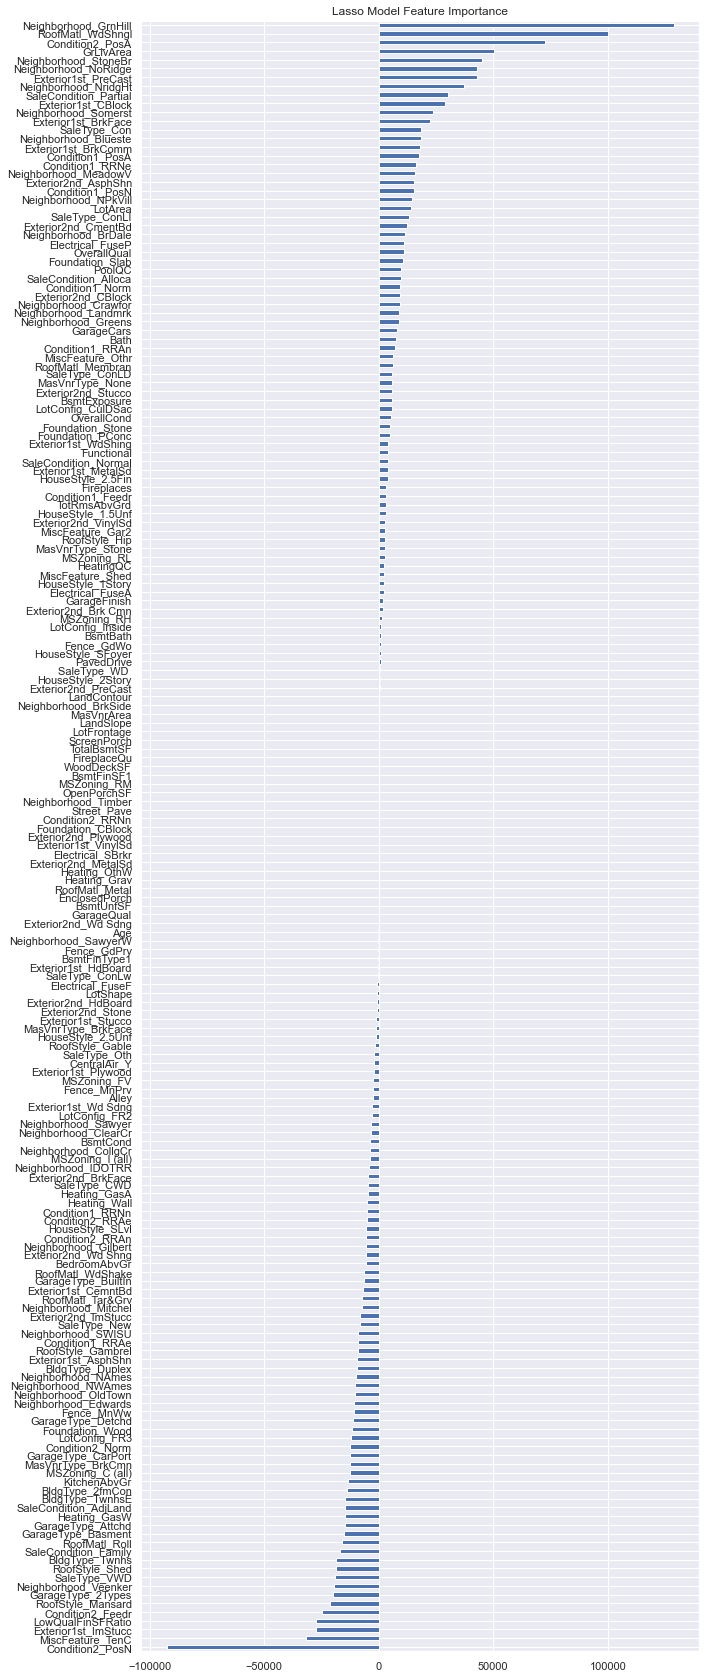

In [356]:
# mod = lm.ridge(y_train1 ~ x_train1.,  lambda = seq(0,0.1,0.001))
# plot(mod)

plt.figure(figsize=(10,30))

coef = pd.Series(lasso1.best_estimator_.coef_, index = X_train1.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8, 6)
imp_coef.plot(kind = "barh")
plt.title("Lasso Model Feature Importance")

### 4 . elastic net

In [313]:
from sklearn.linear_model import ElasticNet

parameters = {
    'alpha': np.arange(0.0001, 1, 0.25),
    'l1_ratio': np.arange(0.0001, 1, 0.25),
    #'fit_intercept': [True, False],
    #'selection': ['cyclic', 'random']
}


elastic1 = GridSearchCV(ElasticNet(random_state=413, normalize=True),
                        parameters,
                        cv=5)
elastic1.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=ElasticNet(normalize=True, random_state=413),
             param_grid={'alpha': array([1.000e-04, 2.501e-01, 5.001e-01, 7.501e-01]),
                         'l1_ratio': array([1.000e-04, 2.501e-01, 5.001e-01, 7.501e-01])})

In [314]:
elastic1.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.0001}

In [315]:
elastic1.score(X_train1, y_train1)

0.9061685087341733

In [316]:
#elastic1.score(X_train1, y_train1)

###### valuation - 1.linear ######

# Predict
y_pred = elastic1.predict(X_test1)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

# r2_score
print(metrics.r2_score(elastic1.predict(X_test1), y_test1))

24568.791686124296
0.8688845338231446


### 5. SVR

In [317]:
#np.arange(1,10,0.1)

In [318]:
from sklearn import svm

param = { 'kernel' : ('linear'), #('linear', 'poly', 'rbf', 'sigmoid'),
         'degree' : [1],
         'C' : [1,10,100],
         #'epsilon': np.logspace(2,-2,20),
         'epsilon': np.arange(0,1,0.1),
         #'coef0' : [0.01,10,0.5],
         #'gamma' : ('auto','scale')
         'gamma': [0.001]
}


#svr1 = GridSearchCV(svm.SVR(),param,cv=5)
svr1 = svm.SVR(kernel='linear',degree=1,epsilon=0.01,gamma=0.001,C=100)
svr1.fit(X_train1,y_train1)

SVR(C=100, degree=1, epsilon=0.01, gamma=0.001, kernel='linear')

In [319]:
#svr1.best_params_

In [320]:
svr1.score(X_train1, y_train1)

0.848804543851418

In [321]:
#svr1.score(X_train1, y_train1)

###### valuation - 1.linear ######
# Predict
y_pred = svr1.predict(X_test1)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

# r2_score
print(metrics.r2_score(svr1.predict(X_test1), y_test1))

28895.006481734363
0.7685017592542908


### 6. random forest

In [322]:
#forest1 = RandomForestRegressor(random_state=413,)
#forest1.fit(X_train1, y_train1)

In [323]:
from sklearn.ensemble import RandomForestRegressor

#forest1 = RandomForestRegressor(random_state=420)
parameters = {
    #"criterion": ["gini", "entropy"],
    'n_estimators': [10, 100],
    'max_depth': [10, 100],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
    #'min_samples_split': [10, 100],
    #'min_samples_leaf': [10, 100],
}
#forest1 = GridSearchCV(forest1, parameters)
#rmse_cv(forest1, xtrain, ytrain.reshape(-1))


forest1 = GridSearchCV(RandomForestRegressor(random_state=413),
                       parameters,
                       cv=5)
forest1.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=413),
             param_grid={'max_depth': [10, 100],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
                         'n_estimators': [10, 100]})

In [324]:
forest1.best_params_

{'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [325]:
forest1.score(X_train1, y_train1)

0.9815625779179611

In [326]:
#forest1.score(X_train1, y_train1)

###### valuation - 1.linear ######
# Predict
y_pred = forest1.predict(X_test1)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

# r2_score
print(metrics.r2_score(forest1.predict(X_test1), y_test1))

23561.009921470843
0.8766516706011247


### 7. xgboost

In [327]:
#conda install -c conda-forge xgboost

In [328]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit

max_depth = [2, 4, 6, 8]
n_estimators = [50, 100, 200, 400]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

param_grid = dict(max_depth=max_depth, 
                  n_estimators=n_estimators, 
                  learning_rate=learning_rate)


#kfold = TimeSeriesSplit(n_splits=2).get_n_splits([X, y])
fit_params = {"eval_metric": "rmse"}
xgb1 = GridSearchCV(XGBRegressor(random_state=413), param_grid, verbose=1, 
                           #fit_params=fit_params, 
                           #scoring = fit_params,
                           # cv=kfold
                          )
xgb1.fit(X_train1, y_train1)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=413,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 200, 400]},
             verbose=1)

In [329]:
xgb1.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}

In [330]:
xgb1.score(X_train1, y_train1)

0.9860492674559397

In [331]:
##### xgb1.score(X_train1, y_train1)

###### valuation - 1.linear ######
# Predict
y_pred = xgb1.predict(X_test1)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

# r2_score
print(metrics.r2_score(xgb1.predict(X_test1), y_test1))

20663.675192706512
0.9131019437699981


In [340]:
#xgb1.best_estimator_.feature_importances_

Text(0.5, 0, 'Xgboost Feature Importance')

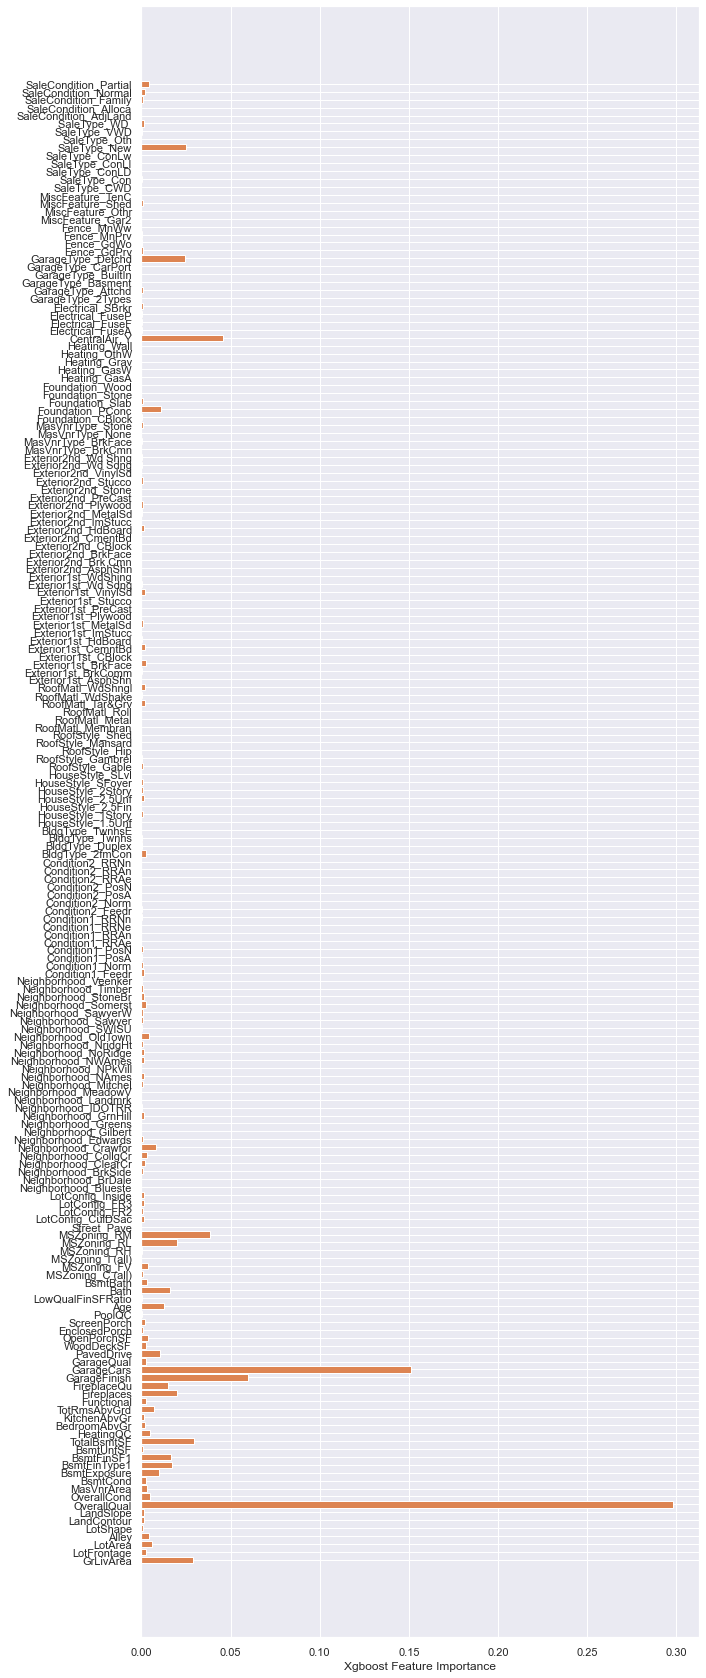

In [345]:
plt.figure(figsize=(10,30))
plt.barh(X_train1.columns, xgb1.best_estimator_.feature_importances_)

sorted_idx = xgb1.best_estimator_.feature_importances_.argsort()
plt.barh(X_train1.columns[sorted_idx], xgb1.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

### 8. Gradient Boost

In [333]:
'''from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    #"loss":["deviance"],
    #"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "learning_rate": [0.01, 0.05, 0.075, 0.1, 0.2],
    #"min_samples_split": np.linspace(0.1, 0.5, 12),
    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
    #"max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    #"max_features":["sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10,50,100]
    }
# passing the scoring function in the GridSearchCV
#clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)


#gb1 = GridSearchCV(GradientBoostingClassifier(random_state=413), parameters, cv=2)
gb1 = GradientBoostingClassifier(random_state=413,n_estimators=100,max_features=7)
gb1.fit(X_train1, y_train1)'''

'from sklearn.ensemble import GradientBoostingClassifier\n\nparameters = {\n    #"loss":["deviance"],\n    #"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],\n    "learning_rate": [0.01, 0.05, 0.075, 0.1, 0.2],\n    #"min_samples_split": np.linspace(0.1, 0.5, 12),\n    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),\n    #"max_depth":[3,5,8],\n    "max_features":["log2","sqrt"],\n    #"max_features":["sqrt"],\n    #"criterion": ["friedman_mse",  "mae"],\n    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],\n    "n_estimators":[10,50,100]\n    }\n# passing the scoring function in the GridSearchCV\n#clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)\n\n\n#gb1 = GridSearchCV(GradientBoostingClassifier(random_state=413), parameters, cv=2)\ngb1 = GradientBoostingClassifier(random_state=413,n_estimators=100,max_features=7)\ngb1.fit(X_train1, y_train1)'

In [ ]:
gb1.best_params_

In [ ]:
gb1.score(X_train1, y_train1)

In [ ]:
#gb1.score(X_train1, y_train1)

###### valuation - 1.linear ######
# Predict
y_pred = gb1.predict(X_test1)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))

# r2_score
print(metrics.r2_score(gb1.predict(X_test1), y_test1))

**1.RMSE**

The most commonly used metric for regression tasks is RMSE (root-mean-square error). This is defined as the square root of the average squared distance between the actual score and the predicted score. A metric that tells us how far apart the predicted values are from the observed values in a dataset, on average. The lower the RMSE, the better a model fits a dataset.

**2. r2_score**

The proportion of the variance in the dependent variable that is predictable from the independent variable(s)

Model	|	R^2	|	RMSE	|	r2_score	|
-----------	|	-----------	|		|		|
MLR	|	0.913321584	|	24684.18503	|	0.878157859	|
Ridge	|	0.90106175	|	24950.00772	|	0.859577949	|
Lasso	|	0.913051336	|	24483.71725	|	0.879735026	|
Elastic-Net	|	0.906168509	|	24568.79169	|	0.868884534	|
SVR	|	0.848804544	|	28895.00648	|	0.768501759	|
Random Forest	|	0.981562578	|	23561.00992	|	0.876651671	|
xgboost	|	0.986049267	|	20663.67519	|	0.913101944	|

## Next Step

1. Expand more about feature importance analysis combining results of fitted models.
2. Expand more about model tunning

## Brief summary

1. Neighborhood, age, above grade (ground) living area, and qualities are major factors influencing the sale prices in Ames, Iowa.
2. From prediction perspective, tree-based model performs better than regression models.
3. xgboost is the best one using the given data to train and test.